<a href="https://colab.research.google.com/github/sachinbhure/Zomato-Data-Analysis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import ast
import re
import math
from geopy.geocoders import Nominatim
# libraries for displaying images
from IPython.display import Image
from IPython.core.display import HTML
from folium.plugins import FloatImage
import folium # plotting library
from folium.plugins import HeatMap

import matplotlib.pyplot as plt
import seaborn as sns

# Plotly
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
init_notebook_mode(connected=True)
%matplotlib inline


In [ ]:
rest_df = pd.read_csv(r"C:\Users\Coursera_Capstone-master\Final Project\rest\zomato.csv", encoding='utf-8')


In [ ]:
#Lets drop duplicates based on the value from two columns address and name
rest_df = rest_df.drop_duplicates(subset=['address', 'name']).reset_index().drop('index', axis=1)


In [ ]:
rest_df.head()


url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [ ]:
###<b>Some of our dish_liked rows are empty, lets extract the dish liked in a restaurant from the reviews in restaurant, All the reviews that were >=3 will be used.</b>
##Since the column reviews_list, menu_item are in the form of list of tuples but as we read it from file we need to explicitly convert it to list
rest_df['reviews_list'] =  rest_df['reviews_list'].apply(ast.literal_eval)
rest_df['menu_item'] =  rest_df['menu_item'].apply(ast.literal_eval)

In [ ]:
li = []
def func(x):
    global li
    li = li + x
_ = rest_df[rest_df['menu_item']!="[]"]['menu_item'].apply(func)


In [ ]:
# convert all the menu to lower case letter and storing in the variable food_corpus
food_corpus = list(map(str.lower, set(li)))


In [ ]:
menu_corpus = []
for x in food_corpus:
    menu_corpus.append(re.sub("\[.*\]|\(.*\)", "", x).strip())

In [ ]:
menu_corpus = []
for x in food_corpus:
    menu_corpus.append(re.sub("\[.*\]|\(.*\)", "", x).strip())


In [ ]:
len(menu_corpus)


71424

In [ ]:
ind = rest_df[rest_df['reviews_list']!="[]"].index
for i in ind:
    liked = set()
    for review in rest_df.loc[i,'reviews_list']:
        if(float(review[0].replace('Rated ',''))>=3):
            for menu in menu_corpus:
                if(menu in review[1]):
                    liked.add(menu)
    print(liked)

{'fried rice', 'soya chaap', 'butter roti', 'roti', 'bread', 'chilli paratha', 'rice', 'masala papad', 'kulcha', 'palak', 'papad', 'baby corn', 'paratha.', 'paratha', 'poi', 'butter', 'fried'}
{'uttar dakshin', 'undo', 'paneer', 'garlic fried rice', 'fried', 'fried rice', 'paneer kurchan', 'spicy', 'mix veg', 'roti', 'lunch', 'veg', 'sweet', 'burnt garlic fried rice', 'veggie', 'sweet and spicy', 'chicken', 'chicken biryani', 'chicken biryan', 'rice', 'egg'}
{'disco', 'choco', 'cake', 'milk', 'spicy', 'nachos', 'coffee', 'pasta', 'lasagne', 'smile', 'water', 'chocolate', 'nutella', 'hot choco', 'shakes', 'hot chocolate', 'pink pasta', 'veg', 'sicilia pizza', 'pizza', 'sweet', 'special', 'poi', 'churros', 'veggie', 'coconut milk', 'chocolate sauce', 'veggies', 'rice', 'egg'}
{'rice with sambar', 'ice cream', 'dosa', 'sambar', 'full meals', 'rice bath', 'full meal', 'limited meal', 'ghee', 'smile', 'veg rice', 'masala dosa', 'pulka', 'water', 'mango', 'apple', 'pineapple', 'payasam', 've

{'dosa', 'prawns', 'thali', 'fish', 'chicken wings', 'tandoori chicken', 'spicy', 'alfaham', 'lunch', 'chocolate', 'kadai chicken', 'lollipop', 'grape', 'chai', 'special', 'anjal tawa', 'sev', 'anjal', 'chicken biryan', 'grill', 'shawarma', 'lime', 'ghee rice', 'veg lovers', 'parota', 'kadai', 'tandoori roti', 'butter masala', 'chicken kadai', 'butter chicken', 'prawns tawa', 'roll', 'anjal tawa fry', 'dal', 'tandoori', 'noodles', 'chicken skewer', 'pepper chicken', 'butter', 'coin parota', 'chicken kabab', 'paneer butter masala', 'al faham', 'chicken gravy', 'meal', 'rice', 'kabab', 'grill chicken', 'panneer butter masala', 'tawa fry', 'ghee', 'fresh lime', 'grape juice', 'paneer butter', 'special chicken', 'shakes', 'pulpy grape juice', 'soda', 'veg', 'butter chicken curry', 'pulpy grape', 'chicken biryani', 'chapati', 'chicken curry', 'choco', 'paneer', 'mutton biryani', 'latte', 'roti', 'lime soda', 'grilled chicken', 'chili chicken', 'chilly chicken', 'fresh lime soda', 'naan', 'a

{'spice', 'tea', 'paneer', 'onion raitha', 'rabadi', 'poratta', 'fried', 'roasted', 'spicy', 'onion', 'raitha', 'mint cooler', 'mushroom', 'special', 'mushroom fry', 'poi', 'butter', 'egg chilli', 'chicken', 'rice', 'egg'}
{'chicken', 'chicken rolls', 'roll', 'chicken roll'}
{'butter naan', 'kit kat', 'roomali roti', 'butter naan.', 'kit kat shake', 'white sauce pasta', 'paneer', 'schezwan noodle', 'naan.', 'baby corn', 'schezwan noodles', 'fried', 'chicken noodles', 'fried rice', 'spicy', 'baby corn chil', 'roti', 'coffee', 'crispy babycorn', 'dal khichdi', 'paneer tikka', 'bread', 'pasta', 'water', 'cold coffee', 'chicken tikka', 'veg pasta', 'packing', 'seu', 'curd', 'veg', 'dal', 'naan', 'noodles', 'chicken noodle', 'garlic bread', 'special', 'non-veg', 'poi', 'butter', 'curd rice', 'cold coffe', 'chicken noodles.', 'churi', 'chicken tikka masala', 'chicken', 'red sauce pasta', 'veg red sauce pasta', 'meal', 'garlic butter naan', 'khichdi', 'rice', 'jamun', 'baby corn chilly'}
{'ro

{'ice cream', 'lychee', 'choco', 'milk', 'chocolate fudge', 'vanilla', 'coffee', 'blueberry ice cream', 'chocolate', 'blueberry', 'fudge', 'roll', 'overload', 'wafer', 'sweet', 'special', 'kulfi', 'vanilla ice cream', 'kesar kulfi', 'chocolate sauce', 'rice', 'banana'}
{'biriyani rice', 'butter naan', 'prawns', 'butter masala', 'panner butter masala', 'fried', 'fried rice', 'chicken noodles', 'panner butter', 'chicken fried rice', 'biriyani rice.', 'naan', 'noodles', 'chicken noodle', 'prawns fried rice', 'butter', 'chicken', 'rice', 'prawns fried rice.'}
{'chai'}
set()
{'raita', 'veg lovers', 'kabab', 'tea', 'mutton biryani', 'chicken roll', 'crispy chicken biryani', 'tandoori chicken', 'spicy', 'chicken rolls', 'lemon chicken roll', 'onion', 'lunch', 'chicken kabab.', 'shadi ka biryani', 'packing', 'roll', 'veg', 'tandoori', 'tandoori kebab', 'sweet', 'lemon chicken', 'crispy chicken', 'special', 'non-veg', 'poi', 'malai kofta', 'chicken kabab', 'chicken gravy', 'chicken', 'chicken b

{'lime', 'idli', 'milk', 'rasmalai', 'badam', 'puri', 'samosa', 'legendary', 'kachori', 'curd', 'chai', 'sweet', 'laddu', 'special', 'kulfi', 'cap', 'moti chur laddu', 'dahi', 'dahi puri', 'badam milk'}
{'mixed', 'baby corn', 'fried', 'fried rice', 'spicy', 'mushroom pepper', 'bread', 'pasta', 'smile', 'fries', 'mushroom', 'garlic bread', 'cheese garlic bread', 'schezwan fried rice', 'poi', 'cheese', 'mixed sauce pasta', 'mayo', 'rice', 'mayonnaise', 'triple schezwan fried rice'}
{'lime', 'butterscotch milkshake', 'dosa', 'fruit juice', 'milk', 'pongal', 'sandwich', 'rice bath', 'butter fruit juice', 'onion', 'coffee', 'butterscotch', 'masala dosa', 'onion dosa', 'veg', 'milkshake', 'special', 'akki rotti', 'set dosa', 'butter fruit', 'poi', 'butter', 'filter coffee', 'cap', 'rawa dosa', 'pulao', 'rice', 'rava dosa', 'capsicum'}
{'cap', 'burger', 'onion', 'veg', 'paneer', 'pizza', 'sandwich', 'capsicum', 'cheese'}
{'pepper dry', 'palak paneer', 'spice', 'thali', 'lassi', 'hot gulab jam

{'biryani rice', 'packing', 'chicken manchuri', 'churi', 'spicy', 'chicken', 'rice', 'chicken manchurian', 'egg'}
{'fried rice', 'churi', 'onion', 'coffee', 'meal', 'noodles', 'lunch', 'vada', 'rice', 'special', 'adas', 'fried'}
{'prawns', 'spice', 'andhra meal', 'jeera rice', 'veg fried rice.', 'sambar', 'thali', 'chicken hot and sour soup', 'hulk', 'fried', 'fish', 'spicy', 'carrier meals', 'carrier meal', 'lunch', 'water', 'gongura mutton', 'lollipop', 'mutton fry biryani', 'payasam', 'special', 'crab', 'sev', 'cap', 'fry piece biryani', 'rasam', 'chicken biryan', 'bun', 'spite', 'ghee rice', 'fish curry.', 'chicken lollipop', 'chicken fry', 'poriyal', 'rice bath', 'veg thali', 'veg dum biryani', 'paratha', 'biryani rice', 'fish curry', 'crab fry', 'dal', 'tandoori', 'chicken hot and sour', 'hot and sour soup', 'poi', 'chicken dum biriyani', 'curd rice', 'chicken gravy', 'golden prawns', 'ghee rice.', 'meal', 'rice', 'veg meals', 'boneless chicken', 'veg meal', 'chicken majestic', '

{'carrot halwa', 'mini meal', 'ice cream', 'dosa', 'saga', 'idli', 'kesari', 'paneer', 'milk', 'bondas', 'thali', 'puri', 'butter masala', 'baby corn', 'bhajji', 'sandwich', 'masala puri', 'indian meals', 'kharabath', 'fried', 'north indian thali', 'fried rice', 'paper masala', 'pav', 'bonda soup', 'roti', 'coffee', 'paper masala dosa', 'pav bhaji', 'lunch', 'water', 'masala dosa', 'bhaji', 'paneer butter', 'carrot', 'shakes', 'milkshake', 'special', 'paneer chilly', 'halwa', 'poi', 'indian meal', 'butter', 'paneer butter masala', 'churi', 'paneer butter masala.', 'mini meals', 'meal', 'bonda', 'rice', 'north indian meals', 'rotis', 'gobi manchuri', 'north indian meal'}
{'kotte kadubu', 'wheat pongal', 'pongal', 'thumbs up'}
{'prawn ghee roast', 'chicken gravy', 'chicken', 'roti', 'ghee roast', 'ghee', 'kori roti', 'rice', 'appam'}
{'fried rice', 'schezwan fried rice', 'rice', 'fried'}
{'cheese ball', 'lassi', 'sandwich', 'mojito', '2 garlic bread', 'nachos', 'bread', 'pasta', 'cheese 

{'ice cream', 'cheese fries', 'tender coconut ice cream', 'kabab', 'milk', 'jackfruit ice cream', 'jackfruit', 'jackfruit thick shake', 'sandwich', 'egg roll', 'tender coconut', 'fish', 'spicy', 'water', 'fries', 'mango', 'fish meals', 'mango shake', 'apple', 'roll', 'coconut ice cream', 'shakes', 'burger', 'soda', 'milkshake', 'special', 'poi', 'fish meal', 'sev', 'cheese', 'kheema', 'churi', 'chicken', 'meal', 'mayo', 'rice', 'egg', 'birthday treat', 'kebab'}
{'lime', 'ice cream', 'papad', 'palak', 'fried', 'fried rice', 'roasted', 'last night', 'bread', 'lunch', 'water', 'smile', 'carrot', 'roll', 'veg', 'naan', 'garlic bread', 'special', 'halwa', 'veggie roll', 'cheese', 'veggie', 'butter', 'mast', 'rice', 'tomato shorba', 'egg', 'kebab'}
{'disco', 'almond', 'choco', 'tea', 'milk', 'sandwich', 'strawberry shake', 'coffee', 'kiwi', 'fries', 'chocolate', 'strawberry', 'shakes', 'red velvet shake', 'red velvet', 'veg', 'french fries', 'milkshake', 'smoothies', 'special', 'berry shake'

{'rajma', 'disco', 'paneer', 'thali', 'lassi', 'combo meal', 'kadhai paneer', 'butter masala', 'hulk', 'rajma masala', 'aloo paratha', 'phulka', '2 paratha', 'spicy', 'onion', 'roti', 'lunch', 'ajwain paratha', 'out of the blue', 'paratha', 'chai', 'veg', 'tuna', 'mushroom', 'sabji', 'special', 'poi', 'butter', 'sev', 'poha', 'churi', 'pickle', 'meal', 'rice', 'fanta', 'paratha.', 'birthday treat', 'missi roti'}
{'hot dog', 'roll', 'fried momo', 'burger', 'paneer', 'rice', 'fried momos', 'momos', 'fried'}
{'tea cake', 'passion fruit', 'almond', 'choco', 'tea', 'cake', 'pista', 'brain', 'vanilla', 'hazel', 'chocolate', 'orange', 'strawberry', 'rose', 'eclair', 'hazelnut', 'tac', 'poi', 'orange chocolate', 'fanta'}
{'jamun', 'sweet', 'gulab jamun'}
{'veg fried rice', 'chicken manchuri', 'chicken tandoor', 'veg noodle', 'fried', 'fried rice', 'tandoori chicken', 'spicy', 'brain', 'roti', 'chicken fried rice', 'bread', 'water', 'roast chicken', 'packing', 'roll', 'dum biryani', 'triple fri

{'do pyaza', 'ice cream', 'veg cutlet', 'cheese ball', 'paneer', 'dry fruit lassi', 'thali', 'lassi', 'pakoda', 'papad', 'hulk', 'dry fruits', 'fried', 'veg kofta', 'aloo gobhi', 'cheese overload', 'mop', 'spicy', 'cutlet', 'onion', 'spicy fries', 'batura', 'cheese burst paratha', 'shrikhand', 'cheese balls', 'water', 'dry fruit', 'fries', 'paneer lababdar', 'gobi aloo', 'paratha', 'dal makhani', 'masala fries', 'pulkha', 'overload', 'cheese paratha', 'veg', 'dal', 'matar pulao', 'fruit lassi', 'parata', 'french fries', 'sweet', 'special', 'bharta', 'dal makhni', 'poi', 'veggie', 'cheese', 'butter', 'cheesy', 'paneer paratha', 'cutlets', 'meal', 'pulao', 'veggies', 'veg cutlets', 'rice', 'dry fruits lassi', 'fulka', 'fruits lassi', 'paratha.', 'egg'}
{'rabadi'}
{'curd rice', 'mixture', 'curd', 'veg', 'meal', 'veggies', 'rice', 'egg', 'veggie'}
{'maggi', 'tea', 'milk', 'paneer', 'paneer roll', 'oreo', 'mosambi juice', 'pav', 'lunch', 'vada', 'roll', 'cheese maggi', 'mac n cheese', 'nood

{'ice cream', 'strawberry milkshake with ice cream', 'choco', 'milk', 'strawberry milkshake', 'milkshake with ice cream', 'sandwich', 'fried', 'fried rice', 'watermelon', 'pasta', 'water', 'fries', 'chocolate', 'strawberry', 'chocolate milk shake', 'gobi manchuria', 'shakes', 'burger', 'gobi manchurian', 'noodles', 'milkshake', 'pizza', 'chocolate milk', 'poi', 'churi', 'wedges', 'fresh juice', 'rice', 'gobi manchuri', 'potato wedges'}
{'roll', 'ice cream', 'fruit juice', 'pizza', 'rice', 'sandwich'}
set()
{'strawberry', 'chocolate milk shake', 'ice cream', 'shakes', 'tornado', 'choco', 'milk', 'sweet', 'rice', 'chocolate milk', 'chocolate', 'poi', 'milk shakes'}
set()
set()
{'veg', 'tea', 'kalakand', 'kalakan', 'sweet', 'milk', 'special', 'badam', 'badam milk', 'dhokla', 'non-veg', 'paratha'}
{'ice cream', 'chocolate ice cream', 'spice', 'choco', 'cake', 'smile', 'rice', 'chocolate'}
{'ida', 'cap', 'pundi', 'butter murg', 'cake', 'bun', 'capsicum puff', 'vada', 'rice', 'maddur vada', 

{'dosa', 'saga', 'paneer', 'corn and capsicum masala', 'palak soup', 'puri', 'papad', 'palak', 'kharabath', 'fried', 'fish', 'fried rice', 'spicy', 'corn capsicum masala', 'tawa fry', 'capsicum masala', 'onion', 'roti', 'coffee', 'ghee roast', 'paneer tikka', 'bread', 'lunch', 'ghee', 'masala papad', 'masala dosa', 'paneer ghee roast', 'kulcha', 'hot and sour', 'curd', 'veg', 'dal', 'hot and sour soup', 'special', 'poi', 'veggie', 'curd rice', 'cap', 'churi', 'thumbs up', 'dal tadka', 'meal', 'veggies', 'bun', 'rice', 'rotis', 'tomato soup', 'capsicum', 'egg'}
set()
{'carrot halwa', 'apple', 'pineapple', 'legendary', 'dosa', 'coffee', 'kesari', 'kesari bath', 'khali dosa', 'peni', 'benne dose', 'water', 'rice', 'halwa', 'carrot', 'kesaribath'}
{'meal'}
{'chicken', 'veg', 'fried chicken', 'egg', 'fried'}
{'chicken curry', 'chicken', 'chicken biryani', 'chilli chicken', 'mudde', 'chicken biryan'}
{'dosa', 'kesari', 'idli', 'sambar', 'bajji', 'idly', 'special meal', 'kesaribath', 'coffee'

{'mutton seekh kabab', 'malai paneer tikka', 'chicken curry', 'raita', 'mixed', 'kabab', 'jalebi', 'spice', 'paneer', 'milk', 'cheese naan', 'lassi', 'naan.', 'fish', 'onion kulcha', 'butter chicken', 'spicy', 'onion', 'roti', 'malai paneer', 'paneer tikka', 'lassi shot', 'chicken soup', 'kulcha', 'mutton seekh', 'buttermilk', 'seekh kabab', 'paratha', 'rabdi', 'mutton rogan', 'dal makhani', 'chicken shorba', 'dal', 'naan', 'sweet', 'amritsari fish', 'poi', 'butter', 'malai kofta', 'cheese', 'kheema', 'chicken', 'rice', 'chicken tikka', 'paneer starters'}
{'tea', 'paneer', 'onion rings', 'rasgulla', 'veg starter', 'spicy', 'onion', 'crispy vegetables', 'paneer tikka', 'lunch', 'water', 'pasta', 'crispy veg', 'veg starters', 'rabdi', 'veg', 'naan', 'noodles', 'jamoon', 'sweet', 'crispy vegetable', 'poi', 'butter', 'litchi', 'chicken', 'onion ring', 'gulab jamoon'}
{'chicken steak', 'chicken', 'peri peri chicken steak', 'tea', 'pizza', 'peri peri chicken'}
{'ice cream', 'disco', 'dosa', 

{'veg exotic burger', 'choco', 'lassi', 'chicken patty', 'brownie shake', 'mojito', 'strawberry bliss', 'hot dog', 'brownie', 'brain', 'grilled veg', 'smile', 'fries', 'grilled veggies', 'strawberry', 'shakes', 'burger', 'potato krunch burger', 'veg', 'special', 'tac', 'veggie', 'cheese', 'choco brownie shake', 'peri wedges', 'chicken', 'wedges', 'veggies', 'rice', 'choco brownie', 'grill', 'potato burger', 'egg', 'strawberry bliss mojito'}
{'prawn pizza', 'peri peri sauce', 'prawns', 'spice', 'chicken bacon prawn pizza', 'choco mocha', 'ravioli', 'pesto prawn pizza', 'fish', 'spicy', 'toppings', 'water', 'chocolate', 'hot chocolate', 'chai', 'garlic bread', 'special', 'mocha', 'berry shake', 'cap', 'regular pizza', 'bun', 'potato wedges', 'caramel walnut tart', 'spite', 'lime', 'chicken wrap', 'bread', 'barbeque chicken', 'cappuccino', 'ida', 'crostata di ricotta', 'bacon wrapped prawns', 'spinach and paneer lasagne', 'poi', 'butter', 'cheesecake', 'peanut', 'chicken pizza', 'meal', '

{'paneer', 'bread', 'pizza', 'water', 'toppings', 'paneer wrap', 'poi', 'cheese'}
{'fish', 'popcorn', 'chicken', 'chai', 'veg', 'rice', 'popcorn chicken', 'fish biriyani', 'poi'}
{'dosa', 'spice', 'idli', 'thali', 'idly', 'puri', 'butter masala', 'butter masala dosa', 'spicy', 'pav', 'smile', 'masala dosa', 'south indian thali', 'pani puri', 'veg', 'sweet', 'special', 'butter', 'churi', 'smiles', 'uttapam', 'rice'}
{'chicken curry', 'raita', 'tea', 'chicken keema', 'thali', 'roti', 'gulab jamun', '3 chapati', 'paratha', 'gobhi paratha', 'special chicken', 'curd', 'special chicken thali', 'dal', 'aloo dry', 'sabji', 'special', 'poi', 'dal fry', 'chicken', 'keema', 'meal', 'chicken thali', 'rice', 'rotis', 'chapati', 'jamun'}
{'green peas', 'mushroom green peas masala', 'palak paneer', 'mushroom', 'green peas masala', 'paneer', 'thali', 'palak', 'peas masala', 'malai kofta'}
{'spice', 'spicy'}
{'fried rice', 'schezwan rice', 'churi', 'manchurian balls', 'lunch combo', 'rice combo', 'nood

{'coffee'}
{'chicken salami pizza', 'margarita pizza', 'cheese margarita pizza', 'veg meal', 'pizza combo', 'disco', 'spice', 'choco', 'cake', 'tea', 'margherita', 'chilli garlic veg pizza', 'coke', 'brownie cake', 'choco lava', 'brownie', 'vegetarian pizza', 'spicy', 'spicy chicken', 'om pizza', 'onion', 'non veg pizza combo', 'bread', 'toppings', 'lunch', 'pasta', 'fries', 'chocolate', 'bbq mushroom pizza', 'choco lava cake', 'fiery chicken', 'apple pie', 'apple', 'chicken salami', 'pineapple', 'double cheese margherita', 'veg', 'mushroom', 'garlic bread', 'french fries', 'pizza', 'special', 'veg pizza combo', 'double cheese', 'poi', 'salami pizza', 'cheese', 'veg spicy', 'butter', 'cheesy', 'cap', 'potato pops', 'chicken', 'chicken pizza', 'meal', 'spicy chicken pizza', 'regular pizza', 'rice', 'mushroom pizza', 'lava cake', 'veg pizza', 'capsicum'}
{'fudge', 'kesar kulfi', 'ice cream', 'chocolate ice cream', 'death by chocolate', 'choco', 'rice', 'special', 'chocolate', 'kulfi'}
{'

{'chicken curry', 'kabab', 'paneer', 'tandoori chicken.', 'pop chicken', 'rumali', 'chicken wings', 'roasted', 'tandoori chicken', 'spicy', 'paneer chili', 'roti', 'grilled chicken', 'lollipop chicken', 'lunch', 'dragon chicken', 'executive chicken biryani', 'lollipop', 'veg', 'naan', 'tandoori', 'parotta', 'chicken starters', 'chicken', 'chicken biryani', 'chicken biryan', 'grill', 'hariyali kabab', 'rice', 'shawarma', 'kebab'}
set()
{'spicy', 'khichdi', 'sweet', 'papad', 'palak', 'palak khichdi'}
{'chicken', 'chicken biryani', 'grilled chicken', 'chicken biryan', 'lunch', 'grill', 'special', 'fanta'}
{'ice cream', 'choco', 'cake', 'milk', 'tiramisu cake', 'irish coffee', 'chocolate chip', 'jelly', 'paan ice cream', 'tiramisu', 'chocolate based', 'coffee', 'paan', 'fries', 'chocolate', 'dry fruit', 'mango', 'packing', 'roll', 'french fries', 'sweet', 'smoor sundae', 'chocolate sauce', 'irish', 'rice'}
{'tea', 'chicken lollipop', 'fried chicken momo', 'hulk', 'phulka', 'fried', 'fried 

{'chilli paneer', 'tea', 'paneer', 'dragon chopsuey', 'mushroom pepper salt', 'pepper salt', 'mushroom pepper', 'veg hot and sour soup', 'lunch', 'hot and sour', 'veg dragon chopsuey', 'ida', 'veg', 'mushroom', 'noodles', 'hot and sour soup', 'sweet', 'special', 'non-veg', 'poi', 'exotic vegetable', 'manchow soup', 'chicken', 'meal', 'rice', 'manchow', 'exotic vegetables'}
{'burger', 'cutlet', 'french fries', 'mayo', 'bun', 'fries', 'buns'}
{'tandoori chicken', 'carrier meals', 'chicken', 'carrier meal', 'meal', 'spice', 'tandoori', 'tandoori chicken.', 'chicken fry', 'lunch', 'thali', 'chana'}
{'poi'}
{'poha', 'palak', 'poi', 'kachori'}
{'dragon roll', 'veg fried rice', 'chilli paneer', 'hunan chicken sauce', 'schezwan veg', 'paneer', 'garlic sauce', 'chicken rice', 'fried', 'fried rice', 'garlic chicken', 'garlic noodles', 'hunan chicken', 'dragon rolls with garlic sauce', 'schezwan veg fried rice', 'drums of heaven', 'roll', 'paneer gravy', 'veg', 'noodles', 'special', 'schezwan veg

{'lime', 'margarita pizza', 'plain cheese', 'disco', 'mixed', 'pesto', 'spice', 'tea', 'sausage', 'slice', 'margherita', 'lassi', 'coke', 'adas', 'margherita pizza', 'classic pizza', 'make your own', 'roasted', 'vegetarian pizza', 'brain', 'pizza margherita', 'cheeseless pizza', 'onion', 'om pizza', 'pepperoni', 'mozzarella pizza', 'bread', 'toppings', 'water', 'lunch', 'pasta', 'cheese pizza', 'soft drinks', 'classic', 'paratha', 'apple', 'packing', 'roll', 'pineapple', 'toast', 'chai', 'veg', 'dal', 'mushroom', 'pizza', 'sweet', 'special', 'poi', 'cheese', "babe's demise pizza", 'cap', 'cheesy', 'mozzarella sticks', 'chicken', 'chicken pizza', 'meal', 'regular pizza', 'bun', 'rice', 'mushroom pizza', 'fanta', 'mozzarella stick', 'spite'}
set()
{'burger', 'chicken', 'fresh juice', 'cake', 'milk', 'rice', 'smile', 'lassi', 'sandwich', 'chicken biriyani'}
{'palak', 'sweet', 'meal', 'poori'}
{'fried rice', 'drums of heaven', 'churi', 'chicken', 'noodles', 'paneer', 'rice', 'water', 'momo

{'burnt pepper chicken', 'chicken schezwan', 'veg chilly garlic', 'nam prik chicken', 'lifu chicken', 'schezwan noodle', 'garlic sauce', 'schezwan noodles', 'non veg chilly', 'garlic fried rice', 'hakka noodles', 'fried', 'fried rice', 'fish', 'dumpling', 'veg chilly garlic fried rice', 'chicken schezwan noodles', 'spicy', 'chicken schezwan noodle', 'hakka noodle', 'chilly garlic fried rice', 'ida', 'packing', 'veg', 'noodles', 'schezwan fried rice', 'special', 'crispy chicken', 'pepper chicken', 'poi', 'chicken starters', 'veg chilly', 'chicken', 'rice'}
{'2 idli', 'pomegranate', 'dosa', 'meal', 'idli', 'milk', 'rice', 'masala dosa', 'pomegranate milk shake', 'papad'}
{'neer dosa', 'fish curry.', 'bondas sukka', 'dosa', 'squid sukka', 'bondas', 'veg curry', 'fried', 'fish', 'prawn ghee roast', 'spicy', 'tawa fry', 'ghee roast', 'ghee', 'chicken ghee roast', 'fish meals', 'fish curry', 'veg', 'sweet', 'fish meal', 'mackerel', 'clams sukka', 'chicken', 'meal', 'bonda', 'rice'}
{'choco',

{'pav', 'burger', 'masala fries', 'tea', 'vadapav', 'vada', 'fries'}
{'strawberry', 'watermelon', 'water', 'banana', 'kulfi'}
{'neer dosa', 'pepper dry', 'dosa', 'prawns', 'kori roti', 'fish', 'prawns ghee roast', 'roti', 'ghee roast', 'chicken ghee roast', 'ghee', 'lunch', 'fries', 'fish pulimunchi', 'fish meals', 'masala fries', 'ganji', 'fish meal', 'chicken pepper', 'kokum', 'chicken', 'meal', 'rice', 'chicken pepper dry'}
{'fish', 'spicy', 'chicken', 'chicken tandoori', 'chicken tandoor', 'tandoori'}
{'rice', 'fanta'}
{'pav', 'tea', 'vada', 'grill', 'vada pav', 'egg'}
{'aloo gobi', 'hulk', 'phulka'}
{'brownie', 'ice cream', 'fried momo', 'spicy', 'chicken', 'noodles', 'water', 'chicken pakora', 'fried momos', 'momos', 'paratha', 'egg', 'cheese', 'fried'}
set()
{'paratha', 'thali', 'special'}
{'roasted', 'chicken', 'disco', 'veg', 'meal', 'paneer', 'chicken burrito bowl', 'roasted paneer', 'egg', 'chicken burrito'}
{'fried rice', 'roasted', 'veg', 'tea', 'rice', 'hot tea', 'thali',

{'bhel', 'ghee jalebi', 'mixed', 'jalebi', 'twister', 'tea', 'puri', 'tikki chat', 'pav', 'paan', 'pav bhaji', 'ghee', 'water', 'kachori', 'bhaji', 'pani puri', 'laddu', 'sweet', 'aloo tikki', 'dabeli', 'meal', 'tikki chaat', 'potato twister', 'dahi', 'bhel puri', 'dahi puri', 'aloo tikki chaat'}
{'falooda', 'ice cream', 'rose', 'kulfi falooda', 'malai kulfi', 'choco bar', 'choco', 'sweet', 'lunch', 'lassi', 'kulfi'}
{'ida', 'maida paratha', 'bread', 'rice', 'thali', 'grill', 'puri', 'special', 'paratha', 'spite', 'whole wheat bread', 'kebab'}
{'rajma', 'latte', 'spicy', 'gulab jamun', 'paneer', 'masala paratha', 'jamun', 'rajma masala', 'paratha'}
set()
set()
{'boneless chicken', 'chicken tikka.', '2 roti', 'prawns', 'chilli baby corn', 'spice', 'tea', 'milk', 'paneer', 'black pepper', 'puri', 'achari chicken', 'coke', 'baby corn', 'rabadi', 'boneless chicken biryani', 'fish', 'tandoori chicken', 'spicy', 'roti', 'chicken kebab', 'chicken 65', 'bread', 'lunch', 'achari chicken tikka',

{'peri peri sauce', 'tea', 'fried', 'chicken wings', 'african peri peri', 'cottage cheese steak', 'vada', 'cottage cheese', 'packing', 'veg', 'pizza', 'special', 'butter', 'cheese', 'farm house special pizza', 'chicken', 'rice', 'veg pizza', 'khichadi', 'farm house veg pizza', 'cheese steak'}
{'dal tadka', 'roti', 'dal', 'naan', 'sabji', 'rotis'}
set()
{'shakes', 'tea', 'milk', 'pasta', 'fries', 'waffle', 'waffles', 'milk shakes'}
set()
{'kabab'}
set()
{'undo', 'pav', 'burger', 'veg', 'vada', 'rice', 'lassi', 'classic', 'vada pav', 'classic vada pav'}
{'packing', 'nippat masala', 'nippat', 'spicy', 'masala maggi', 'onion', 'bun butter jam', 'maggi', 'gulkand', 'nannari juice', 'bun', 'rice', 'bun butter', 'puri', 'panipuri', 'butter'}
{'poha', 'jalebi', 'veg', 'dal', 'smile', 'sabji', 'dal kichdi', 'kichdi'}
{'apple', 'dates'}
{'ghee dosa', 'poori', 'dosa', 'poori bhaaji', 'coffee', 'idli', 'veg', 'tea', 'idli vada', 'ghee', 'rice', 'vada', 'pongal', 'idly', 'lunch', 'sambar', 'variety

{'chicken sizzler', 'ice cream', 'cheesy stuffed mushrooms', 'cheese fries', 'onion soup', 'cherry', 'sausages', 'cupcake', 'spice', 'choco', 'tea', 'paneer', 'sausage', 'chicken keema', 'cake', 'stuffed mushrooms', 'oreo', 'fish', 'cottage cheese sizzler', 'brownie', 'caramel cappuccino', 'brownie with vanilla ice cream', 'spicy', 'fish steak', 'chicken steak', 'vanilla', 'onion', 'hazel', 'special cold coffee', 'coffee', 'grilled chicken', 'nachos', 'dirty fries', 'all meat', 'chocochip', 'pasta', 'lunch', 'bread', 'fries', 'special coffee', 'cold coffee', 'cappuccino', 'roll', 'shakes', 'pepper sauce', 'hazelnut', 'veg', 'mushroom', 'sweet', 'pizza', 'special', 'all meat pizza', 'stuffed chicken', 'poi', 'cheese', 'veggie', 'vanilla ice cream', 'cheesy', 'cap', 'cold coffe', 'chicken', 'keema', 'eggs', 'wedges', 'fish sizzler', 'veggies', 'fresh salad', 'rice', 'grill', 'stuffed mushroom', 'cottage cheese', 'egg', 'salad'}
{'melon juice', 'kabab', 'sandwich', 'fried', 'fried rice', 

{'chai', 'tea'}
set()
{'fruit bowl', 'coffee', 'sandwich', 'tea'}
{'shakes', 'chai', 'milk', 'milkshake', 'special', 'ginger chai'}
{'manchow soup', 'schezwan rice', 'chicken', 'soft drinks', 'rice', 'chicken manchow', 'chicken manchow soup', 'manchow', 'triple schezwan rice'}
set()
{'churi', 'chicken', 'kabab', 'veg', 'mushroom', 'mushroom dry', 'sholay kabab', 'sweet', 'rice', 'chicken starters'}
{'chicken sizzler', 'spice', 'tea', 'milk', 'white sauce pasta', 'black current shake', 'mojito', 'fried', 'fried rice', 'fish', 'aqua', 'mint mojito', 'red rice', 'coffee', 'pasta', 'special fried rice', 'fries', 'cold coffee', 'shakes', 'black current', 'veg', 'pasta salad', 'noodles', 'milkshake', 'special', 'rocher', 'black current milkshake', 'poi', 'veggie', 'cold coffe', 'chicken', 'veggies', 'rice', 'egg', 'salad'}
{'ida', 'shakes', 'cheese ball', 'dal', 'milk', 'milkshake', 'cheese balls', 'hide and seek', 'sandwich', 'cheese'}
set()
{'special'}
set()
{'spicy', 'roti', 'meal', 'sabj

{'dosa', 'baby corn curry', 'saga', 'tea', 'sambar', 'thali', 'paper dosa', 'idly', 'combo meal', 'baby corn', 'puri', 'paper masala', 'spicy', 'onion', 'roti', 'coffee', 'paper masala dosa', 'lunch', 'masala dosa', 'bhaji', 'chole bhature', 'pao bhaji', 'south indian thali', 'pani puri', 'veg', 'dal', 'naan', 'sabji', 'special', 'set dosa', 'poi', 'filter coffee', 'garlic naan', 'bhature', 'meal', 'onion uttappa', 'rice', 'rotis', 'chole'}
{'meal', 'paneer paratha', 'paneer', 'smile', 'bhaji', 'paratha'}
{'meal', 'veg', 'chappathi', 'rice', 'non-veg'}
{'drums of heaven', 'roll', 'chicken', 'lemon chicken', 'rice'}
set()
{'neer dosa', 'chicken curry', 'cherry', 'dosa', 'prawns', 'anise', 'cupcake', 'spice', 'cake', 'paneer', 'milk', 'mangalore chicken curry', 'kori rotti', 'thali', 'cream of mushroom soup', 'baby corn', 'pepper fry', 'prawns masala', 'combo meal', 'chicken sukka', 'oreo', 'veg curry', 'fried', 'fish', 'fried rice', 'butter chicken', 'latte', 'spicy', 'baby corn chil', 

{'packing', 'rice', 'meal', 'fanta'}
set()
{'ice cream', 'berry blast', 'chilli guava ice cream', 'guava ice cream', 'choco', 'sweet', 'poi', 'rocher', 'chocolate', 'puri', 'chilli guava', 'mango', 'sev'}
{'kpl', 'meal', 'idli', 'rice', 'salads', 'salad'}
set()
set()
{'lime', 'veg', 'rice', 'corn sandwich', 'sandwich'}
{'chicken', 'rice', 'special', 'spicy'}
set()
set()
set()
set()
{'cherry', 'prawn curry', 'cake', 'paneer', 'schezwan noodle', 'lassi', 'grill chicken', 'rabadi', 'mutton sheek', 'schezwan noodles', 'tandoori chicken', 'spicy', 'lunch', 'prawn chilly', 'smile', 'paneer lababdar', 'veg', 'tandoori', 'noodles', 'naan', 'veg combo', 'special', 'poi', 'matha', 'veggie', 'mutton gravy', 'chicken', 'mutton curry', 'chicken gravy', 'mast', 'veggies', 'hyderabadi biryani', 'rice', 'grill', 'shawarma', 'egg'}
{'boneless chicken biryani', 'boneless chicken', 'chicken', 'chicken biryani', 'meal', 'spice', 'tea', 'chicken biryan', 'lunch', 'water', 'peni', 'full meal'}
{'packing', '

{'boneless chicken', 'boneless chicken biriyani', 'spicy', 'chicken', 'veg', 'chilli chicken', 'tea', 'sambar', 'poi', 'chicken dum biriyani', 'chicken biriyani'}
{'ice cream', 'waffle cone', 'disco', 'almond', 'choco', 'cake', 'red velvet cake', 'nutty professor sundae', 'oreo', 'vanilla', 'chocolate ice cream', 'toppings', 'smile', 'butterscotch', 'chocolate', 'fudge', 'packing', 'blue sparkle', 'butter scotch', 'red velvet', 'chai', 'red velvet ice cream', 'special', 'waffle', 'salted caramel', 'poi', 'cheese', 'butter', 'almond praline', 'cheesecake', 'litchi', 'thumbs up', 'meal', 'rice'}
{'malai chicken', 'chicken', 'roti', 'meal', 'tandoori', 'rice', 'special', 'rotis', 'tandoori roti', 'poi'}
{'biryani rice', 'spicy', 'veg', 'bun', 'rice', 'chapati', 'non-veg', 'mutton chops', 'mutton chops dry', 'poi'}
{'shakes', 'milk', 'milkshake', 'rice', 'sandwich'}
set()
{'plum cake', 'ice cream', 'disco', 'cookie', 'rainbow', 'choco', 'cake', 'tea', 'fruit cake', 'brownie', 'vanilla', 'b

{'chicken tikka', 'family pack biryani', 'kpl', 'basmati rice', 'chicken', 'boneless biryani', 'spice', 'rice', 'jamun', 'rabadi', 'sev', 'chicken boneless biryani'}
{'paneer', 'butter masala', 'fried', 'fried rice', 'roti', 'toppings', 'water', 'paratha', 'tomato rice', 'paneer butter', 'dal', 'special', 'paneer chilly', 'butter', 'paneer butter masala', 'churi', 'paneer paratha', 'meal', 'rice', 'rotis', 'spite', 'salad', 'plain paratha'}
{'fish', 'rice', 'special', 'fish and chips', 'fried'}
set()
{'spice', 'egg', 'spicy', 'egg biryani'}
set()
set()
{'roti.', 'roti', 'chole masala', 'spice', 'paneer', 'rice', 'chole', 'kadhai paneer', 'soya chaap'}
{'kabab'}
set()
{'packing', 'special chicken', 'chicken curry', 'special chicken meal', 'chicken', 'roti', 'meal', 'grill', 'rice', 'grill chicken', 'special', 'rabadi', 'poi', 'chicken meal', 'chicken meals'}
set()
set()
{'pizza', 'thumbs up'}
set()
set()
{'eggless', 'cake', 'bread', 'rice', 'egg', 'poi'}
{'ice cream', 'disco', 'choco', 

{'samosa', 'ice cream', 'supreme', 'burger', 'pav', 'keema vada pav', 'keema', 'spicy', 'veg', 'veg burger', 'rice', 'vada', 'veg momos', 'veg momo', 'momos', 'vada pav', 'non-veg', 'sprouts'}
set()
{'rice'}
set()
set()
set()
set()
set()
set()
set()
{'non-veg', 'veg & non-veg', 'rice', 'veg'}
set()
set()
set()
{'raita', '2 roti', 'jeera rice', 'rice combo', 'paneer', 'thali', 'dhokla', 'puri', 'papad', 'butter masala', 'sandwich', 'masala puri', 'hara bhara kebab', 'roti', 'gulab jamun', 'paneer tikka', 'paneer butter', 'dal', 'pulav', 'poi', 'butter', 'paneer butter masala', 'rice', 'rotis', 'jamun', 'kebab'}
{'fish', 'fish curry', 'dal', 'lunch', 'rice'}
set()
set()
set()
set()
set()
set()
set()
set()
set()
{'veg nachos', 'chicken curry', 'disco', 'cheese ball', 'prawns', 'spice', 'tea', 'cake', 'peri peri chicken', 'oreo', 'veg starter', 'fish', 'chicken wings', 'fish finger', 'lamb chops', 'nachos', 'ghee roast', 'grilled chicken', 'chicken kebab', 'cheese balls', 'ghee', 'water', 

{'rajma', 'ice cream', 'undo', 'raita', 'veg lovers', 'kabab', 'spice', 'tea', 'paneer', 'puri', 'papad', 'fried', 'fried rice', 'brownie', 'spicy', 'roti', 'paan', 'bread', 'lunch', 'pasta', 'masala papad', 'fries', 'water', 'seekh kabab', 'hot and sour', 'apple', 'ida', 'sizzling brownie', 'chai', 'veg', 'mushroom', 'chilli mushroom fried rice', 'naan', 'bombay', 'sweet', 'noodles', 'special', 'ice tea', 'rabri', 'halwa', 'poi', 'kulfi', 'roti.', 'mushroom fried rice', 'veg biryani', 'churi', 'garlic naan', 'veg kolapuri', 'chilli mushroom', 'bun', 'rice', 'rotis', 'chole', 'egg'}
set()
{'fish', 'mutton kebab', 'dahi kebab', 'fish tikka', 'spice', 'dahi', 'kebab'}
{'lunch', 'tuna'}
{'green tea', 'falafel burger', 'hummus platter', 'spice', 'bun maska', 'milk', 'lassi', 'dry fruits', 'fried', 'brownie', 'spicy', 'pav', 'chocolate shake', 'lunch', 'toppings', 'chocolate', 'apple', 'hot chocolate', 'burger', 'chai', 'special', 'mocha', 'vanilla ice cream', 'sev', 'cap', '4 cheese pizza'

{'green tea', 'choco', 'blueberry muffin', 'cake', 'tea', 'milk', 'berry delight', 'espresso', 'coffee', 'lunch', 'cheese cake', 'chocolate', 'blueberry', 'cold brew', 'cappuccino', 'hot choco', 'hot chocolate', 'special', 'mocha', 'cheese', 'cap', 'meal', 'frappuccino'}
{'samosa', 'cheesecake', 'thumbs up', 'chicken', 'veg samosa', 'coffee', 'veg', 'caramel coffee', 'cake', 'cheese cake', 'chicken samosa', 'cheese'}
set()
{'hazelnut cappuccino', 'disco', 'cookie', 'choco', 'tea', 'cake', 'paneer', 'milk', 'lassi', 'sandwich', 'peanut butter', 'potato fries', 'chocolate cake', 'ice coffee', 'spicy', 'hazel', 'coffee', 'ginger lemon tea', 'toppings', 'bread', 'fries', 'chocolate', 'masala tea', 'cold coffee', 'plain coffee', 'paneer sandwich', 'cappuccino', 'hot choco', 'hot chocolate', 'veg sandwich', 'shakes', 'peanut butter shake', 'chai', 'hazelnut', 'veg', 'lemon tea', 'french fries', 'cheese corn balls', 'pizza', 'sweet', 'chocolate milk', 'special', 'cheese corn ball', 'hot coffe

{'spice', 'choco', 'cake', 'spicy', 'chicken lasagna', 'bread', 'pasta', 'lasagne', 'water', 'chocolate', 'bombay masala quesadilla', 'lasagna', 'veg', 'bombay', 'tac', 'chocolate decadence', 'cheese', 'veggie', 'sev', 'cheesy', 'cheesecake', 'basmati rice', 'chicken', 'minced chicken', 'veggies', 'rice', 'egg'}
{'double chicken roll', 'keema roll', 'mixed', 'kabab', 'tea', 'milk', 'chicken keema', 'chicken roll', 'custard', 'rabadi', 'fried', 'milk tea', 'samosa', 'hyderabadi chicken', 'lemon juice', 'pav', 'cutlet', 'chicken rolls', 'kadi', 'vada', 'water', 'sharbat', 'veg roll', 'roll', 'burger', 'mixed roll', 'masala milk', 'chicken cutlet', 'chai', 'chicken keema roll', 'veg', 'butter bun', 'lemon tea', 'fried chicken', 'special', 'vada pav', 'caramel custard', 'butter', 'chicken', 'keema', 'masala chai', 'masala c', 'cutlets', 'bun', 'rice', 'regular tea', 'sharbath'}
{'lime', 'ice cream', 'choco', 'whey protein', 'milk', 'strawberry lassi', 'lassi', 'jelly', 'sandwich', 'grilled

{'chicken noodles', 'churi', 'chicken', 'onion', 'noodles', 'chicken noodle', 'chilly chicken', 'rice', 'red chilly'}
{'kalmi', 'spice', 'chicken roll', 'mutton sheek', 'shawarma roll', 'fish', 'chicken rolls', 'roti', 'grilled chicken', 'water', 'strawberry', 'roll', 'burger', 'beef chilly', 'beef shawarma', 'sweet', 'special', 'kalmi kebab', 'poi', 'chicken', 'chicken shawarma', 'mayo', 'rice', 'grill', 'mutton seek roll', 'mayonnaise', 'shawarma', 'kebab'}
{'roll', 'spicy', 'chicken', 'chicken biryani', 'grilled baby corn roll', 'corn roll', 'chicken biryan', 'baby corn roll', 'grill', 'rice', 'grilled baby corn', 'baby corn', 'tikka roll'}
{'mixed', 'white sauce pasta', 'shroom sandwich', 'milk', 'lassi', 'sandwich', 'aloo paratha', 'oreo', 'sweet lassi', 'fried', 'aloo gobi', 'onion', 'nachos', 'pasta', 'cheese sandwich', 'water', 'fries', 'paratha', 'aloo gobi paratha', 'roll', 'burger', 'curd', 'cheese paratha', 'veg', 'veg cheese sandwich', 'milkshake', 'sweet', 'special', 'ore

{'lime', 'panner tikka', 'kabab', 'spice', 'babycorn manchurian', 'chicken lollipop', 'fish', 'latte', 'fries', 'momos', 'veg roll', 'apple', 'lollipop', 'roll', 'veg', 'mushroom', 'noodles', 'pizza', 'special', 'lollypop', 'sev', 'churi', 'chicken', 'chicken lollypop', 'rice', 'last night'}
{'prawns', 'butter roti', 'spice', 'tikka biryani', 'fried', 'fish', 'tandoori chicken', 'spicy', 'lunch', 'water', 'fried noodles', 'chicken briyani', 'lollipop', 'afgani chicken', 'chicken manchow', 'special', 'chicken momos', 'dragon mushroom', 'chicken biryan', 'grill', 'chicken lollypop', 'chicken manchow soup', 'shawarma', 'egg fried rice', 'fish fry', 'ghee rice', 'veg lovers', 'rumali', 'wonton', 'dal khichdi', 'bread', 'chicken lolly pop', 'roll', 'dal', 'tandoori', 'noodles', 'poi', 'butter', 'egg curry', 'egg fried', 'mutton gravy', 'chicken gravy', 'meal', 'veggies', 'khichdi', 'rice', 'rotis', 'salad', 'rumali roti', 'kabab', 'grill chicken', 'roti combo', 'fried rice', 'ghee', 'momos'

{'babycorn manchurian', 'tea', 'paneer', 'cream of tomato', 'papad', 'hulk', 'phulka', 'samosa', 'latte', 'roti', 'bread', 'lunch', 'pasta', 'steamed rice', 'ida', 'curd', 'pasta salad', 'veg', 'dal', 'cream of tomato soup', 'tac', '2 phulka', 'cap', 'churi', 'meal', 'rice', 'tomato soup', 'capsicum', 'salad'}
set()
{'fish', 'chicken momos', 'chicken wings', 'spicy', 'chicken', 'garlic naan', 'chicken momo', 'tandoori', 'naan', 'momos', 'kulfi'}
{'latte', 'paneer', 'lunch', 'rice', 'kulcha', 'water', 'lacha paratha', 'paratha.', 'paratha'}
{'fried rice with chicken', 'ice cream', 'disco', 'spice', 'choco', 'cake', 'tea', 'chicken lollipop', 'paneer', 'chocolate roll', 'black pepper', 'garlic sauce', 'chilli guava', 'garlic fried rice', 'fried', 'fish', 'fried rice', 'dumpling', 'spicy', 'chilli fish', 'lunch', 'water', 'chocolate', 'momos', 'lotus', 'hot choco', 'roll', 'drums of heaven', 'hot chocolate', 'lollipop', 'veg', 'noodles', 'capsicum noodles', 'non-veg', 'poi', 'cap', 'chick

{'brownie', 'brownies', 'cookie', 'cupcake', 'eggless', 'cake', 'macarons', 'egg'}
{'dosa', 'mushroom manchuria', 'sambar', 'idly', 'fried', 'fried rice', 'samosa', 'onion', 'soft drinks', 'vada', 'onion dosa', 'mushroom manchurian', 'veg', 'mushroom', 'noodles', 'set dosa', 'idly vada', 'mushroom manchuri', 'churi', 'rice', 'vada sambar'}
{'lime', 'upma', 'omelet', 'kesari', 'choco', 'omelette', 'bread', 'vada', 'poi', 'egg', 'butter', 'kesaribath'}
{'pomegranate', 'shakes', 'pomegranate juice', 'milk', 'milkshake', 'lassi', 'classic', 'smoothie', 'orange'}
set()
{'filter coffee', 'butter cookies', 'shakes', 'cold beverages', 'cookie', 'coffee', 'normal tea', 'coffee shake', 'tea', 'milk', 'bun', 'rice', 'badam', 'badam milk', 'coffee shakes', 'cold beverage', 'butter'}
{'lime', 'chicken stew', 'veg meal', 'fish fry', 'sambhar', 'fish curry.', 'dosa', 'prawns', 'tea', 'milk', 'salt lime juice', 'chicken fry', 'kappa', 'prawns fry', 'lassi', 'pepper chicken fry', 'kappa fish curry', 'f

{'apple', 'legendary', 'apple cake', 'groundnut', 'veg puffs', 'veg', 'cake', 'bread', 'bun', 'congress', 'special', 'buns', 'potato bun', 'rice', 'honey cake', 'veg puff', 'butter', 'fruit cake'}
{'ice cream', 'groundnut', 'almond', 'choco', 'cake', 'cashew', 'apple crumble', 'death by chocolate', 'black forest', 'dry fruits', 'chocolate fudge', 'cake fudge', 'water', 'dry fruit', 'chocolate', 'black forest cake', 'apple', 'fudge', 'hot choco', 'hot chocolate', 'poi', 'hot chocolate fudge', 'chocolate sauce', 'rice', 'evergreen', 'almond fudge', 'spite'}
{'donut', 'choco', 'cake', 'pure chocolate', 'sandwich', 'black forest', 'chocolate pastry', 'samosa', 'tiramisu', 'chocolate cake', 'vanilla', 'pastry', 'butterscotch', 'chocolate', 'blueberry', 'eggless chocolate cake', 'apple', 'roll', 'pineapple', 'sweet', 'pizza', 'special', 'blue berry', 'poi', 'cheese', 'butter', 'cheesecake', 'mini pizza', 'chocolate truffle', 'eggless', 'mast', 'rice', 'choco truffle', 'egg'}
{'ida', 'jelebi'

{'chole masala', 'spice', 'tea', 'slice', 'margherita', 'spicy', 'onion', 'bread', 'toppings', 'ida', 'masala lemon', 'masala lemonade', 'overload', 'veg', 'garlic bread', 'pizza', 'cheese', 'meal', 'rice', 'veg pizza', 'chole', 'lemonade'}
{'bangda', 'dosa', 'prawns', 'kabab', 'spice', 'tea', 'chicken sukka', 'fish', 'tawa fry', 'prawns sukka', 'prawns ghee roast', 'bangda tawa fry', 'ghee roast', 'ghee', 'chicken ghee roast', 'dosa chicken', 'fish meals', 'fish curry', 'dal', 'special', 'bangda tawa', 'fish meal', 'chicken', 'meal', 'rice'}
{'fried rice', 'roll', 'churi', 'spicy', 'onion', 'roti', 'noodles', 'slice', 'rice', 'special', 'fried'}
{'aloo masala', 'sambhar', 'dosa', 'kesari', 'idli', 'idli vada', 'tea', 'sambar', 'badam', 'idly', 'adas', 'kesari bath', 'red chutney', 'sagu masala dosa', 'legendary', 'badam halwa', 'coffee', 'ghee roast', 'single idli vada', 'ghee', 'vada', 'water', 'masala dosa', 'kesari bhat', 'single idli', 'dal', 'sweet', 'halwa', 'poori sagu', 'sev',

{'rice'}
{'rice'}
set()
set()
{'south meal', 'chapathi', 'dosa', 'chai', 'roti', 'meal', 'rice', 'special', 'parotta', 'masala dosa', 'poi'}
set()
set()
{'roll', '2 parota', 'chicken', 'parota', 'chicken roll', 'special', 'cop'}
set()
{'special', 'meal', 'pickle'}
set()
set()
{'green tea', 'dosa', 'idli', 'tea', 'milk', 'medu vada', 'sambar', 'idly', 'pongal', 'lassi', 'rice bath', 'coffee', 'lunch', 'vada', 'ghee', 'masala dosa', 'classic', 'bisibele bath', 'veg south indian', 'veg', 'sweet', 'special', 'akki rotti', 'pulav', 'poi', 'butter milk', 'butter', 'meal', 'rice', 'rava dosa', 'bele bath'}
{'chicken curry', 'stir fry vegetable', 'dosa', 'spice', 'choco', 'tea', 'paneer', 'cake', 'sambar', 'naan.', 'salads', 'veg starter', 'fish', 'brownie cake', 'brownie', 'ground nut', 'lunch', 'smile', 'papdi chaat', 'chocolate', 'veg roll', 'nutella', 'paratha', 'papdi', 'veg starters', 'steamed rice', 'moong dal', 'roll', 'fish curry', 'kheer', 'shahi paneer', 'curd', 'veg', 'dal', 'naan'

{'mustard fish', 'prawns', 'spice', 'rasgulla', 'fried', 'fish', 'spicy', 'misti doi', 'lunch', 'water', 'grilled prawns', 'apple', 'firni', 'peni', 'special', 'crab', 'sandesh', 'grill', 'luchi', 'spite', 'makai roti', 'ice cream', 'chana', 'pan ice cream', 'paneer pasand', 'lamb seekh kebab', 'roll', 'fish curry', 'tangdi kebab', 'dal', 'crispy corn', 'paneer pasanda', 'poi', 'spirit', 'churi', 'meal', 'veggies', 'rice', 'white pasta', 'corn kernels', 'salad', 'disco', 'crab curry', 'cake', 'chana dal', 'sarson da saag', 'fried rice', 'paan ice cream', 'watermelon', 'pasta', 'bhaja', 'pineapple', 'veg', 'mushroom', 'sweet', 'ice tea', 'halwa', 'corn kernel', 'mixed fruit', 'jamun', 'banana', 'egg', 'kebab', 'gilafi seekh', 'chicken curry', 'mixed', 'kofta curry', 'tea', 'paneer', 'palak', 'rabadi', 'roti', 'paan', 'paneer tikka', 'makai ki roti', 'steamed rice', 'aloo posta', 'veggie', 'chicken', 'eggs', 'murgh tikka'}
{'chicken tikka.', 'spice', 'milk', 'white sauce pasta', 'lassi',

{'omelet', 'tea', 'milk', 'omelette', 'detox', 'salads', 'sandwich', 'latte', 'mop', 'stuffed omelette', 'ginger tea', 'lunch', 'water', 'fruit bowl', 'chicken grilled', 'falafel bowl', 'roll', 'burger', 'chai', 'veg', 'sweet', 'ginger chai', 'chicken grilled burger', 'chicken', 'detox water', 'chicken bowl', 'chicken shawarma', 'grill', 'rice', 'falafel', 'shawarma', 'spite', 'salad'}
{'latte', 'chai', 'coffee', 'milk', 'water', 'rice', 'lassi', 'caramel latte'}
{'donut', 'cold coffe', 'club sandwich', 'almond', 'coffee', 'cup cakes', 'choco', 'cake', 'chocolate donut', 'croissant', 'chocolate', 'cold coffee', 'sandwich'}
{'roll', 'chai', 'coffee', 'tea', 'iced tea'}
{'lime', 'green tea', 'choco', 'tea', 'cake', 'chilly cheese', 'chicken patty', 'puri', 'sandwich', 'choco shot', 'cheese toast', 'latte', 'frappe', 'onion', 'coffee', 'toppings', 'chocolate', 'coffee lover', 'cold coffee', 'cappuccino', 'chilly cheese toast', 'shakes', 'toast', 'burger', 'crunchy veg', 'veg', 'pizza', 's

{'chicken popcorn', 'lays', 'chicken pop', 'mixed', 'cake', 'tea', 'potato chips', 'masala chicken', 'spicy', 'chicken steak', 'grilled chicken', 'dry fruit', 'veg', 'noodles', 'grilled chicken steak', 'mac and cheese', 'veggie', 'cheese', 'popcorn', 'cheesy', 'cheesy chicken popcorn', 'chicken', 'chicken biryani', 'masala c', 'cheesy chicken', 'veggies', 'chicken biryan', 'bun', 'rice', 'grill', 'egg'}
{'butter naan', 'sambhar', 'dosa', 'aloo curry', 'idli', 'paneer', 'thali', 'lassi', 'kadhai paneer', 'adas', 'sweet lassi', 'coffee', 'papdi chat', 'ghee', 'vada', 'papdi', 'south indian thali', 'shakes', 'shahi paneer', 'naan', 'sweet', 'butter', 'upma', 'churi', 'poori', 'meal', 'rice', 'salad'}
set()
{'fish', 'lemon pickle', 'spicy', 'fish curry', 'pickle', 'chicken', 'mixed', 'lunch', 'prawn masala', 'special', 'rice', 'natholi', 'achari chicken', 'natholi fry', 'appam'}
{'fanta', 'paneer parantha', 'paneer', 'sattu paratha', 'puri', 'paneer cheese', 'aloo paratha', 'full meal', 't

{'butter naan', 'ghee rice', 'veg lovers', 'kabab', 'chicken hyderabadi', 'toum', 'parota', 'chicken hyderabad', 'grill chicken', 'rabadi', 'grilled fish', 'tikka biryani', 'fish', 'spicy', 'pepper chicken masala', 'green peas', 'roti', 'grilled chicken', 'bread', 'ghee', 'lunch', 'chicken hyderabadi biryani', 'chicken tikka biryani', 'veg', 'naan', 'pepper chicken', 'non-veg', 'poi', 'butter', 'chicken masala', 'sev', 'churi', 'chicken gravy', 'chicken', 'hummus', 'mayo', 'hyderabadi biryani', 'rice', 'grill', 'rotis', 'chicken tikka', 'kebab'}
{'lime', 'kabab', 'tea', 'paneer', 'thali', 'butter masala', 'hulk', 'phulka', 'tikka biryani', 'fish', 'fried', 'fried rice', 'boiled egg.', 'spicy', 'kpl', 'garlic chicken', 'chicken kebab', 'paneer tikka', 'bread', 'lunch', 'veg & veg', 'veg thali', 'paneer butter', 'packing', 'special chicken', 'tangdi kabab', 'ida', 'curd', 'veg', 'naan', 'boiled egg', 'schezwan fried rice', 'special', 'tac', 'paneer tikka biryani', 'special chicken biryan

{'biryani rice', 'chicken', 'kabab', 'meal', 'chilly chicken', 'rice'}
{'boneless chicken', 'phirni', 'raita', 'mixed', 'kesari', 'spice', 'paneer', 'mutton biryani', 'paneer biryani', 'rabadi', 'hyderabadi mutton biryani', 'tikka biryani', 'hyderabadi chicken', 'mix veg', 'gulab jamun', 'paneer tikka', 'claypot hyderabadi chicken biryani', 'lunch', 'chicken tikka biryani', 'non veg combo', 'chicken tikka', 'packing', 'ida', 'seu', 'veg', 'hyderabadi mutton', 'sweet', 'special', 'veg combo', 'mutton biriyani', 'hyderbadi biryani', 'non-veg', 'poi', 'sev', 'veg biryani', 'hyderabadi chicken biryani', 'chicken', 'chicken biryani', 'kesari phirni', 'meal', 'chicken biryan', 'rice', 'jamun', 'boneless chicken tikka'}
{'butter naan', 'butter roti', 'keema biryani', 'spice', 'chicken leg piece', 'chicken butter', 'paneer', 'butter masala', 'rabadi', 'paneer chatpata', 'chilli mutton', 'thums up', 'paneer chatpat', 'spicy', 'roti', 'chicken leg', 'kadhi pakora', 'paneer chat', 'hot and sour',

{'butter naan', 'chicken curry', 'veg lovers', 'spice', 'mushroom masala', 'spicy shawarma', 'roasted', 'tandoori chicken', 'spicy', 'lunch', 'chai', 'veg', 'naan', 'tandoori', 'mushroom', 'sweet', 'special', 'poi', 'butter', 'chicken biriyani', 'chicken', 'mast', 'chilli chicken', 'rice', 'shawarma'}
{'mazza'}
{'fanta', 'cherry', 'sausages', 'spice', 'cake', 'paneer', 'paneer curry', 'sausage', 'thali', 'pakoda', 'combo meal', 'aloo paratha', 'full meal', 'dry fruits', 'non veg roll', 'sabudana kheer', 'cutlet', 'roti', '2 bread', 'paneer makhani', 'paneer tikka', 'bread', 'lunch', 'water', 'vada', 'dry fruit', 'sabudana', 'paratha meal', 'veg roll', 'paratha', 'packing', 'roll', 'paneer masala', 'kheer', 'paneer gravy', 'curd', 'overload', 'veg', 'jamoon', 'parata', 'sweet', 'sabji', 'sabudana khichdi', 'special', 'rice meal', 'cheese', 'aloo parantha', 'paneer makhanwala', 'cap', 'cheesy', 'poori', 'special thali', 'chicken', 'aloo paratha meal', 'singara', 'meal', 'chicken tikka ri

{'boneless chicken', 'chilli prawns', 'mixed', 'prawns', 'family biryani', 'thali', 'veg crispy', 'baby corn', 'rabadi', 'boneless chicken biryani', 'spicy', 'lunch', 'kulcha', 'red hot chicken', 'chilli prawn', 'chicken briyani', 'veg', 'chicken manchow', 'special', 'pepper chicken', 'poi', 'manchow soup', 'chicken', 'chicken biryani', 'chicken biryan', 'rice', 'chicken manchow soup', 'manchow', 'kebab'}
{'cherry', 'ajwaini fish tikka', 'cake', 'tea', 'sausage', 'lassi', 'classic chicken tikka', 'spring rolls', 'fish', 'chicken wings', 'aqua', 'cutlet', 'roti', 'chicken sausage', 'toppings', 'water', 'cheese pizza', 'classic', 'roll', 'shakes', 'chicken cutlet', 'chai', 'fish tikka', 'mushroom', 'spring roll', 'peni', 'pizza', 'sweet', 'special', 'poi', 'cheese', 'chilli cheese', 'roti.', 'popcorn', 'cock', 'cool breeze', 'peanut', 'chicken', 'spinach and corn quiche', 'chicken pizza', 'chilli chicken', 'cheese spring roll', 'rice', 'cocktail', 'chicken bao', 'baklava', 'chicken tikka

AttributeError: 'NoneType' object has no attribute 'replace'

In [ ]:
##After analysing the above output these were some of the frequent non menu words found.
remove_words = ['poi', 'spite', 'churi', 'peni', 'packing', 'meal', 'malt', 'smilies', 'disco', 'tac', 'cap', 'spicy', 'last night', 'cop',
'brain', 'onion', 'spice', 'holige', 'adas', 'sulaimani', 'special', 'combo 4', 'toppings', 'smile', 'water', 'ghee', '',
'mixed', 'slice', 'lunch', 'masala c', 'churi', 'breakfast combo', 'undo', 'full meal', 'fanta', 'cool blue', 'love', 'veg lovers',
'irish', 'fried', 'mast', 'rose', 'overload']

In [ ]:
# Lets remove them from our corpus first
new_menu_corpus = [word for word in menu_corpus if word not in remove_words]

In [ ]:
len(new_menu_corpus)

71363

In [ ]:
# Also lets convert dishes from our dish_liked column to lower case letters
rest_df['dish_liked'] = rest_df['dish_liked'].str.lower()

In [ ]:
#let us see.How many different restaurants are there in Bengaluru
histo = rest_df.groupby('name')['address'].count()
# Lets take the top 50 restaurantsand plot bar graph
histo = histo.sort_values()[-50:]

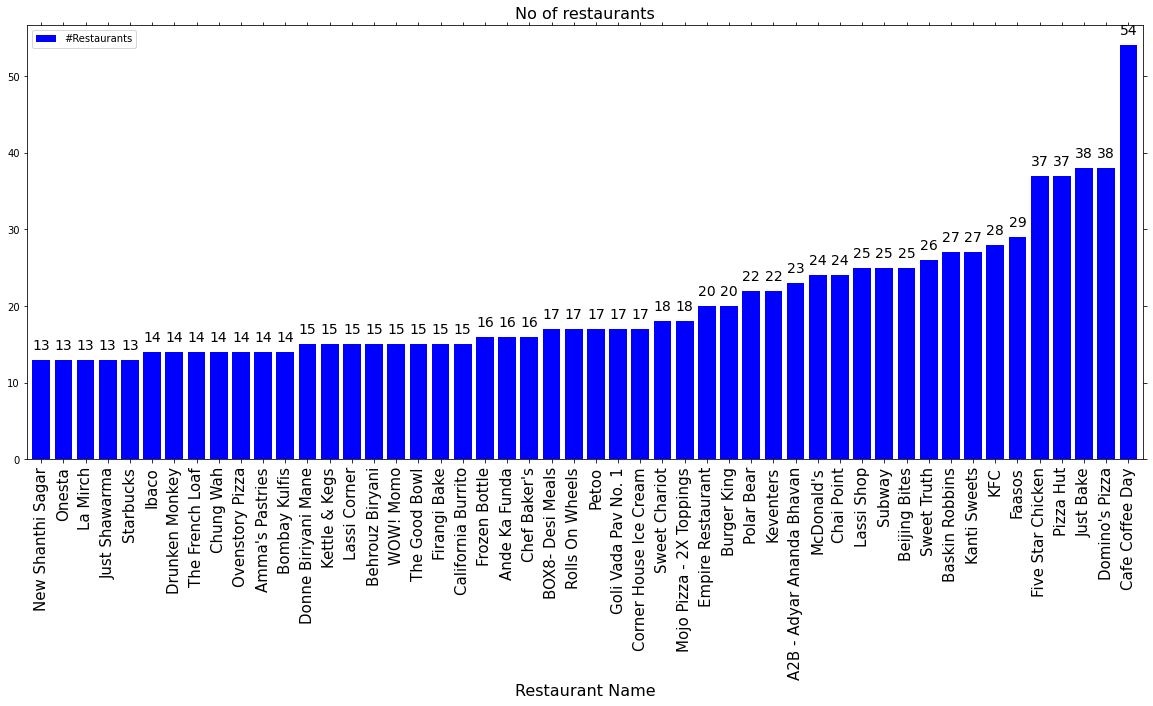

In [ ]:
ax = histo.plot(kind='bar', figsize=(20, 8), rot=90, width = 0.8, color=[ 'blue'])
rects = ax.patches
labels = list(histo)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
            ha='center', va='bottom', fontsize=14)
ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on') # remove borders
ax.xaxis.set_tick_params(labelsize=15) # set xticks as 14
ax.legend(fontsize=14) # set legend sie as 14
ax.set_title('No of restaurants', fontsize=16) # set title and add font size as 16
ax.set_xlabel('Restaurant Name', fontsize=16)
#ax.grid(False)  # remove grid
ax.set_facecolor("white") # set bg color white
ax.legend(['#Restaurants'])

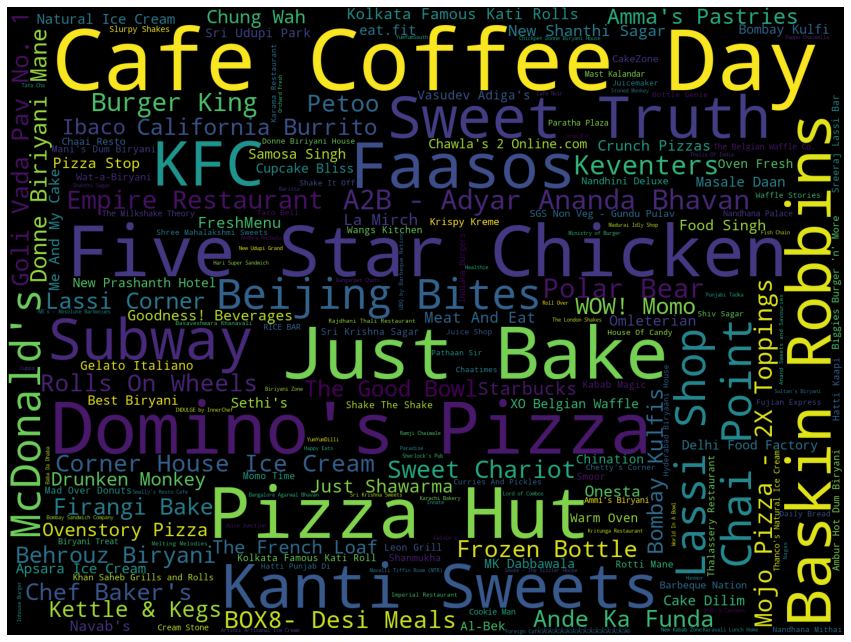

In [ ]:
from subprocess import check_output
from wordcloud import WordCloud
wordcloud = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(rest_df['name'].value_counts()))


fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
##Clearly CCD(Cafe) has the most number of restaurants in Bengaluru, followed by Domino's Pizza

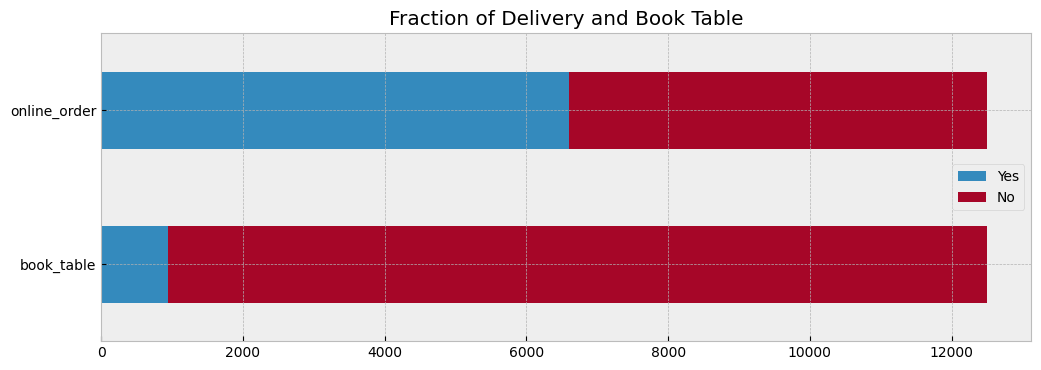

In [ ]:
##### Delivery Restaurant and Table Book
with plt.style.context('bmh', after_reset = True):
    plt.figure(figsize = (12,4))
    ax = plt.subplot(1,1,1)
    tmp = {}
    for col in ['online_order', 'book_table']:
        tmp[col] = rest_df[col].value_counts()
    tmp = pd.DataFrame.from_dict(tmp, orient = 'index')
    tmp.plot.barh(stacked = True, ax = ax)
    ax.set_title('Fraction of Delivery and Book Table')
    plt.show()


In [ ]:
#### Lets take the rating of restaurant and find the average rating for each of the neighborhood
rest_df['rate'] = rest_df['rate'].str.split('/').str[0]

In [ ]:
rest_df.loc[rest_df['rate']=="NEW", 'rate'] = np.nan
rest_df.loc[rest_df['rate']=="-", 'rate'] = np.nan


In [ ]:
rest_df['rate'] = rest_df['rate'].astype('float')


In [ ]:
rest_df.groupby(['location'])['rate'].mean().sort_values()[-50:][:-1]
##Clearly Lavelle Road restaurants are rated higher

location
Whitefield               3.598217
Hebbal                   3.600000
Yelahanka                3.600000
Sarjapur Road            3.603984
Vijay Nagar              3.612000
Banashankari             3.625991
Frazer Town              3.631250
Old Airport Road         3.634259
JP Nagar                 3.634677
Mysore Road              3.637500
HSR                      3.638685
New BEL Road             3.642273
Sahakara Nagar           3.645000
Koramangala 1st Block    3.647273
Kammanahalli             3.649206
Langford Town            3.650000
Koramangala 2nd Block    3.650000
HBR Layout               3.664000
Basavanagudi             3.675141
Brigade Road             3.675926
Koramangala 8th Block    3.686667
Kengeri                  3.700000
Central Bangalore        3.700000
Ulsoor                   3.713978
Koramangala              3.716667
Seshadripuram            3.723913
Malleshwaram             3.727228
Koramangala 6th Block    3.727820
Vasanth Nagar            3.730233
Cunni

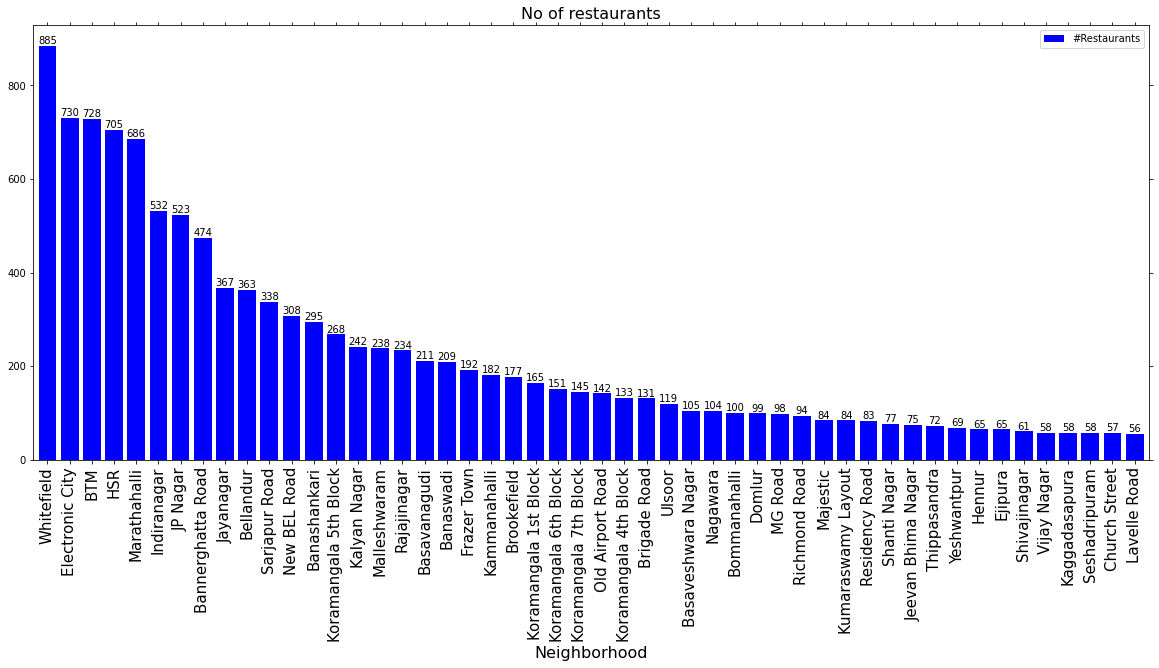

In [ ]:
### Number of restaurants in each Neighborhood
histo = rest_df.groupby('location')['url'].count().sort_values(ascending=False)[:50]
ax = histo.plot(kind='bar', figsize=(20, 8), rot=90, width = 0.8, color=[ 'blue'])
rects = ax.patches
labels = list(histo)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .05, label,
            ha='center', va='bottom', fontsize=10)
ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on') # remove borders
ax.xaxis.set_tick_params(labelsize=15) # set xticks as 14
ax.legend(fontsize=14) # set legend sie as 14
ax.set_title('No of restaurants', fontsize=16) # set title and add font size as 16
ax.set_xlabel('Neighborhood', fontsize=16)
#ax.grid(False)  # remove grid
ax.set_facecolor("white") # set bg color white
ax.legend(['#Restaurants'])

In [ ]:
### Zomato's Presence across Bangalore
labels = list(rest_df.location.value_counts().index)
values = list(rest_df.location.value_counts().values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence in Bangalore",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Neighborhood",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}

iplot(fig)


In [ ]:
#### Grouping the neighborhood by the type of restaurant
types = set()
def func(x):
    if(type(x) == list):
        print(x)
        for y in x:
            types.add(y.strip())
_ = rest_df['rest_type'].str.split(',').apply(func)

['Casual Dining']
['Casual Dining']
['Cafe', ' Casual Dining']
['Quick Bites']
['Casual Dining']
['Casual Dining']
['Casual Dining']
['Casual Dining', ' Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Quick Bites', ' Cafe']
['Cafe']
['Cafe']
['Cafe', ' Quick Bites']
['Cafe']
['Cafe']
['Casual Dining', ' Cafe']
['Cafe']
['Quick Bites']
['Delivery']
['Delivery']
['Quick Bites']
['Delivery']
['Quick Bites']
['Casual Dining']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Mess']
['Quick Bites']
['Quick Bites']
['Delivery']
['Quick Bites']
['Casual Dining']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Dessert Parlor']
['Casual Dining']
['Quick Bites']
['Delivery']
['Quick Bites']
['Casual Dining']
['Quick Bites']
['Dessert Parlor']
['Casual Dining']
['Casual Dining']
['Quick Bites']
['Casual Dining']
['Bakery', ' Dessert Parlor']
['Quick Bites']
['Quick Bites']
['Pub']
['Bakery

['Takeaway', ' Delivery']
['Food Court']
['Delivery']
['Takeaway', ' Delivery']
['Takeaway', ' Delivery']
['Quick Bites']
['Quick Bites']
['Casual Dining']
['Delivery']
['Food Court']
['Takeaway', ' Delivery']
['Delivery']
['Casual Dining']
['Cafe']
['Casual Dining']
['Dessert Parlor']
['Food Court']
['Casual Dining']
['Dessert Parlor']
['Quick Bites']
['Delivery']
['Delivery']
['Beverage Shop']
['Quick Bites']
['Quick Bites']
['Casual Dining']
['Delivery']
['Quick Bites']
['Takeaway', ' Delivery']
['Delivery']
['Beverage Shop']
['Takeaway', ' Delivery']
['Casual Dining']
['Casual Dining']
['Takeaway', ' Delivery']
['Casual Dining']
['Quick Bites']
['Delivery']
['Microbrewery', ' Casual Dining']
['Dessert Parlor']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Dessert Parlor']
['Quick Bites']
['Dessert Parlor']
['Bakery', ' Quick Bites']
['Delivery']
['Quick Bites']
['Quick Bites']
['Sweet Shop', ' Quick Bites']
['Casual Dining']
['Casual Dining']
['Quick Bites']
['Food Co

['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Delivery']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Casual Dining']
['Bakery', ' Dessert Parlor']
['Delivery']
['Quick Bites']
['Dessert Parlor']
['Casual Dining']
['Quick Bites']
['Delivery']
['Quick Bites']
['Casual Dining']
['Quick Bites']
['Beverage Shop']
['Casual Dining']
['Casual Dining']
['Quick Bites']
['Kiosk']
['Quick Bites']
['Casual Dining']
['Delivery']
['Cafe']
['Quick Bites']
['Casual Dining']
['Quick Bites']
['Delivery']
['Beverage Shop']
['Quick Bites']
['Quick Bites']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Beverage Shop', ' Quick Bites']
['Casual Dining']
['Casual Dining']
['Delivery']
['Casual Dining', ' Bar']
['Delivery']
['Casual Dining']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Beverage Shop', ' Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Casual Dining']
['Beverage Shop']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Bakery']
['Quic

['Delivery']
['Delivery']
['Dessert Parlor', ' Bakery']
['Bakery', ' Quick Bites']
['Casual Dining']
['Delivery']
['Delivery']
['Takeaway', ' Delivery']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Bakery']
['Quick Bites']
['Takeaway', ' Delivery']
['Delivery']
['Takeaway', ' Delivery']
['Takeaway', ' Delivery']
['Dessert Parlor']
['Quick Bites']
['Delivery']
['Quick Bites', ' Beverage Shop']
['Quick Bites']
['Delivery']
['Delivery']
['Quick Bites']
['Bakery']
['Delivery']
['Quick Bites']
['Casual Dining']
['Dessert Parlor']
['Quick Bites']
['Casual Dining']
['Quick Bites']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Delivery']
['Casual Dining', ' Bar']
['Delivery']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Delivery']
['Quick Bites']
['Takeaway', ' Delivery']
['Delivery']
['Delivery']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Delivery']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']


['Dessert Parlor']
['Bakery']
['Sweet Shop']
['Dessert Parlor']
['Sweet Shop']
['Dessert Parlor', ' Beverage Shop']
['Dessert Parlor']
['Sweet Shop']
['Beverage Shop', ' Dessert Parlor']
['Dessert Parlor', ' Food Court']
['Food Court']
['Dessert Parlor']
['Dessert Parlor']
['Dessert Parlor']
['Bakery']
['Dessert Parlor']
['Food Court']
['Dessert Parlor']
['Beverage Shop']
['Dessert Parlor']
['Dessert Parlor']
['Dessert Parlor']
['Bakery', ' Food Court']
['Dessert Parlor']
['Dessert Parlor']
['Bakery', ' Dessert Parlor']
['Beverage Shop', ' Dessert Parlor']
['Bakery']
['Bakery']
['Dessert Parlor']
['Sweet Shop']
['Dessert Parlor', ' Quick Bites']
['Dessert Parlor']
['Quick Bites']
['Dessert Parlor']
['Sweet Shop', ' Quick Bites']
['Sweet Shop']
['Bakery']
['Sweet Shop']
['Delivery']
['Dessert Parlor']
['Bakery']
['Sweet Shop']
['Lounge', ' Casual Dining']
['Microbrewery']
['Casual Dining']
['Fine Dining']
['Casual Dining']
['Lounge']
['Casual Dining']
['Casual Dining']
['Quick Bites']
[

In [ ]:
column_names = list(types)
# instantiate the dataframe
neighborhood = pd.DataFrame(columns=column_names)
neighborhood

Empty DataFrame
Columns: [Lounge, Bar, Pop Up, Bhojanalya, Casual Dining, Club, Dessert Parlor, Confectionery, Fine Dining, Food Truck, Quick Bites, Mess, Kiosk, Sweet Shop, Takeaway, Beverage Shop, Irani Cafee, Microbrewery, Dhaba, Bakery, Delivery, Cafe, Meat Shop, Food Court, Pub]
Index: []

[0 rows x 25 columns]

In [ ]:
neighborhood['neighborhood'] = rest_df.groupby('location').groups.keys()
neighborhood = neighborhood.set_index('neighborhood').fillna(0)
neighborhood

Lounge  Bar  Pop Up  Bhojanalya  Casual Dining  \
neighborhood                                                                    
BTM                                 0    0       0           0              0   
Banashankari                        0    0       0           0              0   
Banaswadi                           0    0       0           0              0   
Bannerghatta Road                   0    0       0           0              0   
Basavanagudi                        0    0       0           0              0   
Basaveshwara Nagar                  0    0       0           0              0   
Bellandur                           0    0       0           0              0   
Bommanahalli                        0    0       0           0              0   
Brigade Road                        0    0       0           0              0   
Brookefield                         0    0       0           0              0   
CV Raman Nagar                      0    0       0           0              0   
Central Bangalore                   0    0       0           0              0   
Church Street                       0    0       0           0              0   
City Market                         0    0       0           0              0   
Commercial Street                   0    0       0           0              0   
Cunningham Road                     0    0       0           0              0   
Domlur                              0    0       0           0              0   
East Bangalore                      0    0       0           0              0   
Ejipura                             0    0       0           0              0   
Electronic City                     0    0       0           0              0   
Frazer Town                         0    0       0           0              0   
HBR Layout                          0    0       0           0              0   
HSR                                 0    0       0           0              0   
Hebbal                              0    0       0           0              0   
Hennur                              0    0       0           0              0   
Hosur Road                          0    0       0           0              0   
ITPL Main Road, Whitefield          0    0       0           0              0   
Indiranagar                         0    0       0           0              0   
Infantry Road                       0    0       0           0              0   
JP Nagar                            0    0       0           0              0   
...                               ...  ...     ...         ...            ...   
Old Madras Road                     0    0       0           0              0   
Peenya                              0    0       0           0              0   
RT Nagar                            0    0       0           0              0   
Race Course Road                    0    0       0           0              0   
Rajajinagar                         0    0       0           0              0   
Rajarajeshwari Nagar                0    0       0           0              0   
Rammurthy Nagar                     0    0       0           0              0   
Residency Road                      0    0       0           0              0   
Richmond Road                       0    0       0           0              0   
Sadashiv Nagar                      0    0       0           0              0   
Sahakara Nagar                      0    0       0           0              0   
Sanjay Nagar                        0    0       0           0              0   
Sankey Road                         0    0       0           0              0   
Sarjapur Road                       0    0       0           0              0   
Seshadripuram                       0    0       0           0              0   
Shanti Nagar                        0    0       0           0              0   
Shivajinagar                        0    0       0           0

In [ ]:
i=0
for i in range(0,len(rest_df)):
    for x in types:
        if type(rest_df.loc[i, 'rest_type']) == str and x in rest_df.loc[i, 'rest_type']:
            neighborhood.loc[rest_df.loc[i, 'location'], x] = neighborhood.loc[rest_df.loc[i, 'location'], x]+1

In [ ]:
neighborhood

Lounge  Bar  Pop Up  Bhojanalya  Casual Dining  \
neighborhood                                                                    
BTM                                 0    7       0           0             91   
Banashankari                        1    6       0           0             42   
Banaswadi                           0    4       0           0             39   
Bannerghatta Road                   2    3       0           0             90   
Basavanagudi                        0    4       0           0             33   
Basaveshwara Nagar                  0    2       0           0             20   
Bellandur                           2    6       0           0             84   
Bommanahalli                        0    1       0           0             14   
Brigade Road                        1    6       0           0             40   
Brookefield                         0    2       0           0             37   
CV Raman Nagar                      0    0       0           0              4   
Central Bangalore                   0    0       0           0              0   
Church Street                       2    6       0           0             24   
City Market                         0    0       0           0              9   
Commercial Street                   0    0       0           0              8   
Cunningham Road                     1    1       0           0             20   
Domlur                              1    6       0           0             18   
East Bangalore                      0    0       0           0              0   
Ejipura                             0    0       0           0              4   
Electronic City                     5   17       0           0            159   
Frazer Town                         1    0       0           0             37   
HBR Layout                          0    0       0           0              8   
HSR                                 4   13       0           0            134   
Hebbal                              0    1       0           0              2   
Hennur                              0    1       0           0              6   
Hosur Road                          0    1       0           0              3   
ITPL Main Road, Whitefield          0    2       0           1              6   
Indiranagar                         8   28       0           0            158   
Infantry Road                       0    3       0           0             10   
JP Nagar                            2   15       0           0            118   
...                               ...  ...     ...         ...            ...   
Old Madras Road                     0    0       0           0              1   
Peenya                              0    0       0           0              0   
RT Nagar                            0    1       0           0             17   
Race Course Road                    1    6       0           0             17   
Rajajinagar                         1    8       0           0             43   
Rajarajeshwari Nagar                0    0       0           0              1   
Rammurthy Nagar                     0    0       0           0              2   
Residency Road                      4    7       0           0             24   
Richmond Road                       0    4       0           0             24   
Sadashiv Nagar                      0    0       0           0             13   
Sahakara Nagar                      0    1       0           0              6   
Sanjay Nagar                        0    1       0           0              3   
Sankey Road                         1    1       0           0              1   
Sarjapur Road                       1    6       0           0             65   
Seshadripuram                       3    4       0           0             19   
Shanti Nagar                        0    1       0           0             19   
Shivajinagar                        0    2       0           0

In [ ]:
#swarn plot
dfs = neighborhood.reset_index().melt('neighborhood', var_name='cols',  value_name='vals')

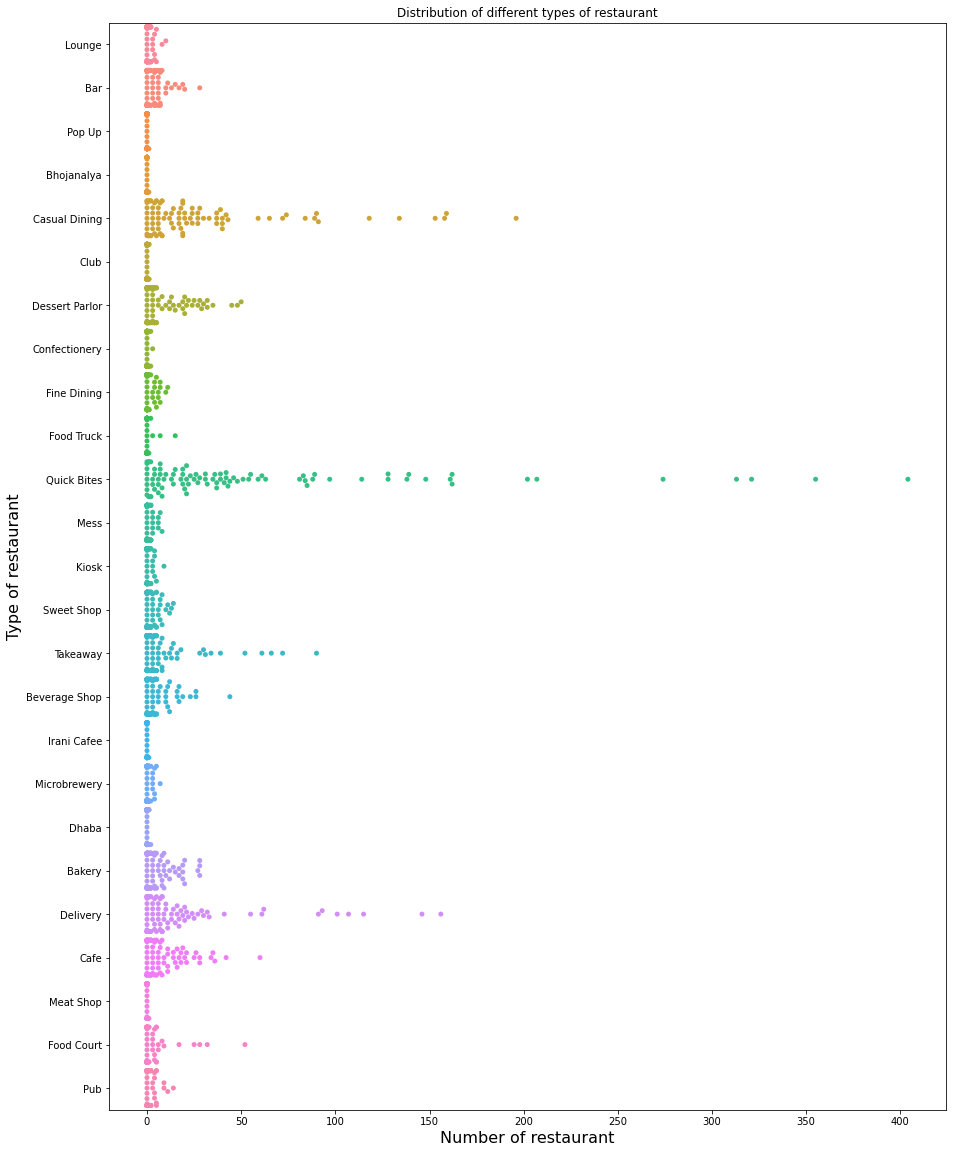

In [ ]:
plt.figure(figsize=(15,20))
ax = sns.swarmplot(x="vals", y="cols", data=dfs)
ax.set_xlabel('Number of restaurant', fontsize=16)
ax.set_ylabel('Type of restaurant', fontsize=16)
ax.set_title('Distribution of different types of restaurant')
plt.savefig("swarm.png")

In [ ]:
#### Grouping the neighborhood by the cuisines
#Is there any neighborhood that is more famous for its cuisines

types = set()
def func(x):
    if(type(x) == list):
        for y in x:
            types.add(y.strip())
_ = rest_df['cuisines'].str.split(',').apply(func)

In [ ]:
column_names = list(types)
# instantiate the dataframe
neighborhood_cns = pd.DataFrame(columns=column_names)
neighborhood_cns

Empty DataFrame
Columns: [Portuguese, Turkish, Momos, Vietnamese, Continental, Russian, Mediterranean, Spanish, Nepalese, Thai, Grill, Bubble Tea, Wraps, Tea, Lebanese, Charcoal Chicken, Singaporean, Sandwich, Maharashtrian, Konkan, Indian, North Eastern, South Indian, Drinks Only, Seafood, Lucknowi, Asian, Rajasthani, Tex-Mex, Rolls, Bengali, Tamil, Kerala, Bohri, Hot dogs, Greek, Bar Food, Belgian, Australian, Indonesian, Chettinad, Sushi, Cantonese, Pan Asian, Iranian, Middle Eastern, South American, Vegan, Burger, Ice Cream, Awadhi, Mithai, Bakery, Mongolian, African, Naga, Japanese, European, Kebab, Tibetan, Fast Food, Modern Indian, Mexican, Korean, Burmese, Sindhi, Goan, Arabian, Pizza, German, Kashmiri, British, Coffee, Biryani, American, Afghani, Italian, French, Paan, North Indian, Raw Meats, Gujarati, Andhra, Healthy Food, Cafe, Mangalorean, Afghan, Jewish, Juices, Oriya, Parsi, Salad, Beverages, Roast Chicken, Bihari, Sri Lankan, Desserts, BBQ, Chinese, Assamese, ...]
Index: []

[0 rows x 107 columns]

In [ ]:
neighborhood_cns['neighborhood'] = rest_df.groupby('location').groups.keys()
neighborhood_cns = neighborhood_cns.set_index('neighborhood').fillna(0)
neighborhood_cns

Portuguese  Turkish  Momos  Vietnamese  \
neighborhood                                                            
BTM                                     0        0      0           0   
Banashankari                            0        0      0           0   
Banaswadi                               0        0      0           0   
Bannerghatta Road                       0        0      0           0   
Basavanagudi                            0        0      0           0   
Basaveshwara Nagar                      0        0      0           0   
Bellandur                               0        0      0           0   
Bommanahalli                            0        0      0           0   
Brigade Road                            0        0      0           0   
Brookefield                             0        0      0           0   
CV Raman Nagar                          0        0      0           0   
Central Bangalore                       0        0      0           0   
Church Street                           0        0      0           0   
City Market                             0        0      0           0   
Commercial Street                       0        0      0           0   
Cunningham Road                         0        0      0           0   
Domlur                                  0        0      0           0   
East Bangalore                          0        0      0           0   
Ejipura                                 0        0      0           0   
Electronic City                         0        0      0           0   
Frazer Town                             0        0      0           0   
HBR Layout                              0        0      0           0   
HSR                                     0        0      0           0   
Hebbal                                  0        0      0           0   
Hennur                                  0        0      0           0   
Hosur Road                              0        0      0           0   
ITPL Main Road, Whitefield              0        0      0           0   
Indiranagar                             0        0      0           0   
Infantry Road                           0        0      0           0   
JP Nagar                                0        0      0           0   
...                                   ...      ...    ...         ...   
Old Madras Road                         0        0      0           0   
Peenya                                  0        0      0           0   
RT Nagar                                0        0      0           0   
Race Course Road                        0        0      0           0   
Rajajinagar                             0        0      0           0   
Rajarajeshwari Nagar                    0        0      0           0   
Rammurthy Nagar                         0        0      0           0   
Residency Road                          0        0      0           0   
Richmond Road                           0        0      0           0   
Sadashiv Nagar                          0        0      0           0   
Sahakara Nagar                          0        0      0           0   
Sanjay Nagar                            0        0      0           0   
Sankey Road                             0        0      0           0   
Sarjapur Road                           0        0      0           0   
Seshadripuram                           0        0      0           0   
Shanti Nagar                            0        0      0           0   
Shivajinagar                            0        0      0           0   
South Bangalore                         0        0      0           0   
St. Marks Road                          0        0      0           0   
Thippasandra                            0        0      0           0   
Ulsoor                                  0        0      0           0   
Uttarahalli                             0        0      0           0   
Varthur Main Roa

In [ ]:
i=0
for i in range(0,len(rest_df)):
    for x in types:
        if type(rest_df.loc[i, 'cuisines']) == str and x in rest_df.loc[i, 'cuisines']:
            neighborhood_cns.loc[rest_df.loc[i, 'location'], x] = neighborhood_cns.loc[rest_df.loc[i, 'location'], x]+1

In [ ]:
neighborhood_cns

Portuguese  Turkish  Momos  Vietnamese  \
neighborhood                                                            
BTM                                     0        1     19           0   
Banashankari                            0        0      9           2   
Banaswadi                               0        0      8           1   
Bannerghatta Road                       0        0     15           1   
Basavanagudi                            0        0      2           0   
Basaveshwara Nagar                      0        0      1           0   
Bellandur                               0        1      3           0   
Bommanahalli                            0        0      2           0   
Brigade Road                            0        0      8           0   
Brookefield                             0        0      3           0   
CV Raman Nagar                          0        0      1           0   
Central Bangalore                       0        0      0           0   
Church Street                           0        0      3           0   
City Market                             0        0      0           0   
Commercial Street                       0        0      1           0   
Cunningham Road                         0        0      2           0   
Domlur                                  0        0      2           0   
East Bangalore                          0        0      0           0   
Ejipura                                 0        0      3           0   
Electronic City                         0        0      9           1   
Frazer Town                             0        0      6           1   
HBR Layout                              0        0      1           0   
HSR                                     0        4     13           0   
Hebbal                                  0        0      0           0   
Hennur                                  0        0      1           0   
Hosur Road                              0        0      0           0   
ITPL Main Road, Whitefield              0        0      3           0   
Indiranagar                             1        1     14           5   
Infantry Road                           0        0      0           1   
JP Nagar                                0        0      7           0   
...                                   ...      ...    ...         ...   
Old Madras Road                         0        0      1           0   
Peenya                                  0        0      0           0   
RT Nagar                                0        1      1           0   
Race Course Road                        0        0      0           1   
Rajajinagar                             0        0      2           0   
Rajarajeshwari Nagar                    0        0      0           0   
Rammurthy Nagar                         0        0      0           0   
Residency Road                          0        0      2           1   
Richmond Road                           0        0      1           0   
Sadashiv Nagar                          0        0      1           1   
Sahakara Nagar                          0        0      1           0   
Sanjay Nagar                            0        0      1           0   
Sankey Road                             0        0      0           0   
Sarjapur Road                           0        1      6           3   
Seshadripuram                           0        0      1           0   
Shanti Nagar                            0        0      0           0   
Shivajinagar                            0        0      0           0   
South Bangalore                         0        0      3           0   
St. Marks Road                          0        1      0           0   
Thippasandra                            0        0      2           0   
Ulsoor                                  0        0      2           0   
Uttarahalli                             0        0      0           0   
Varthur Main Roa

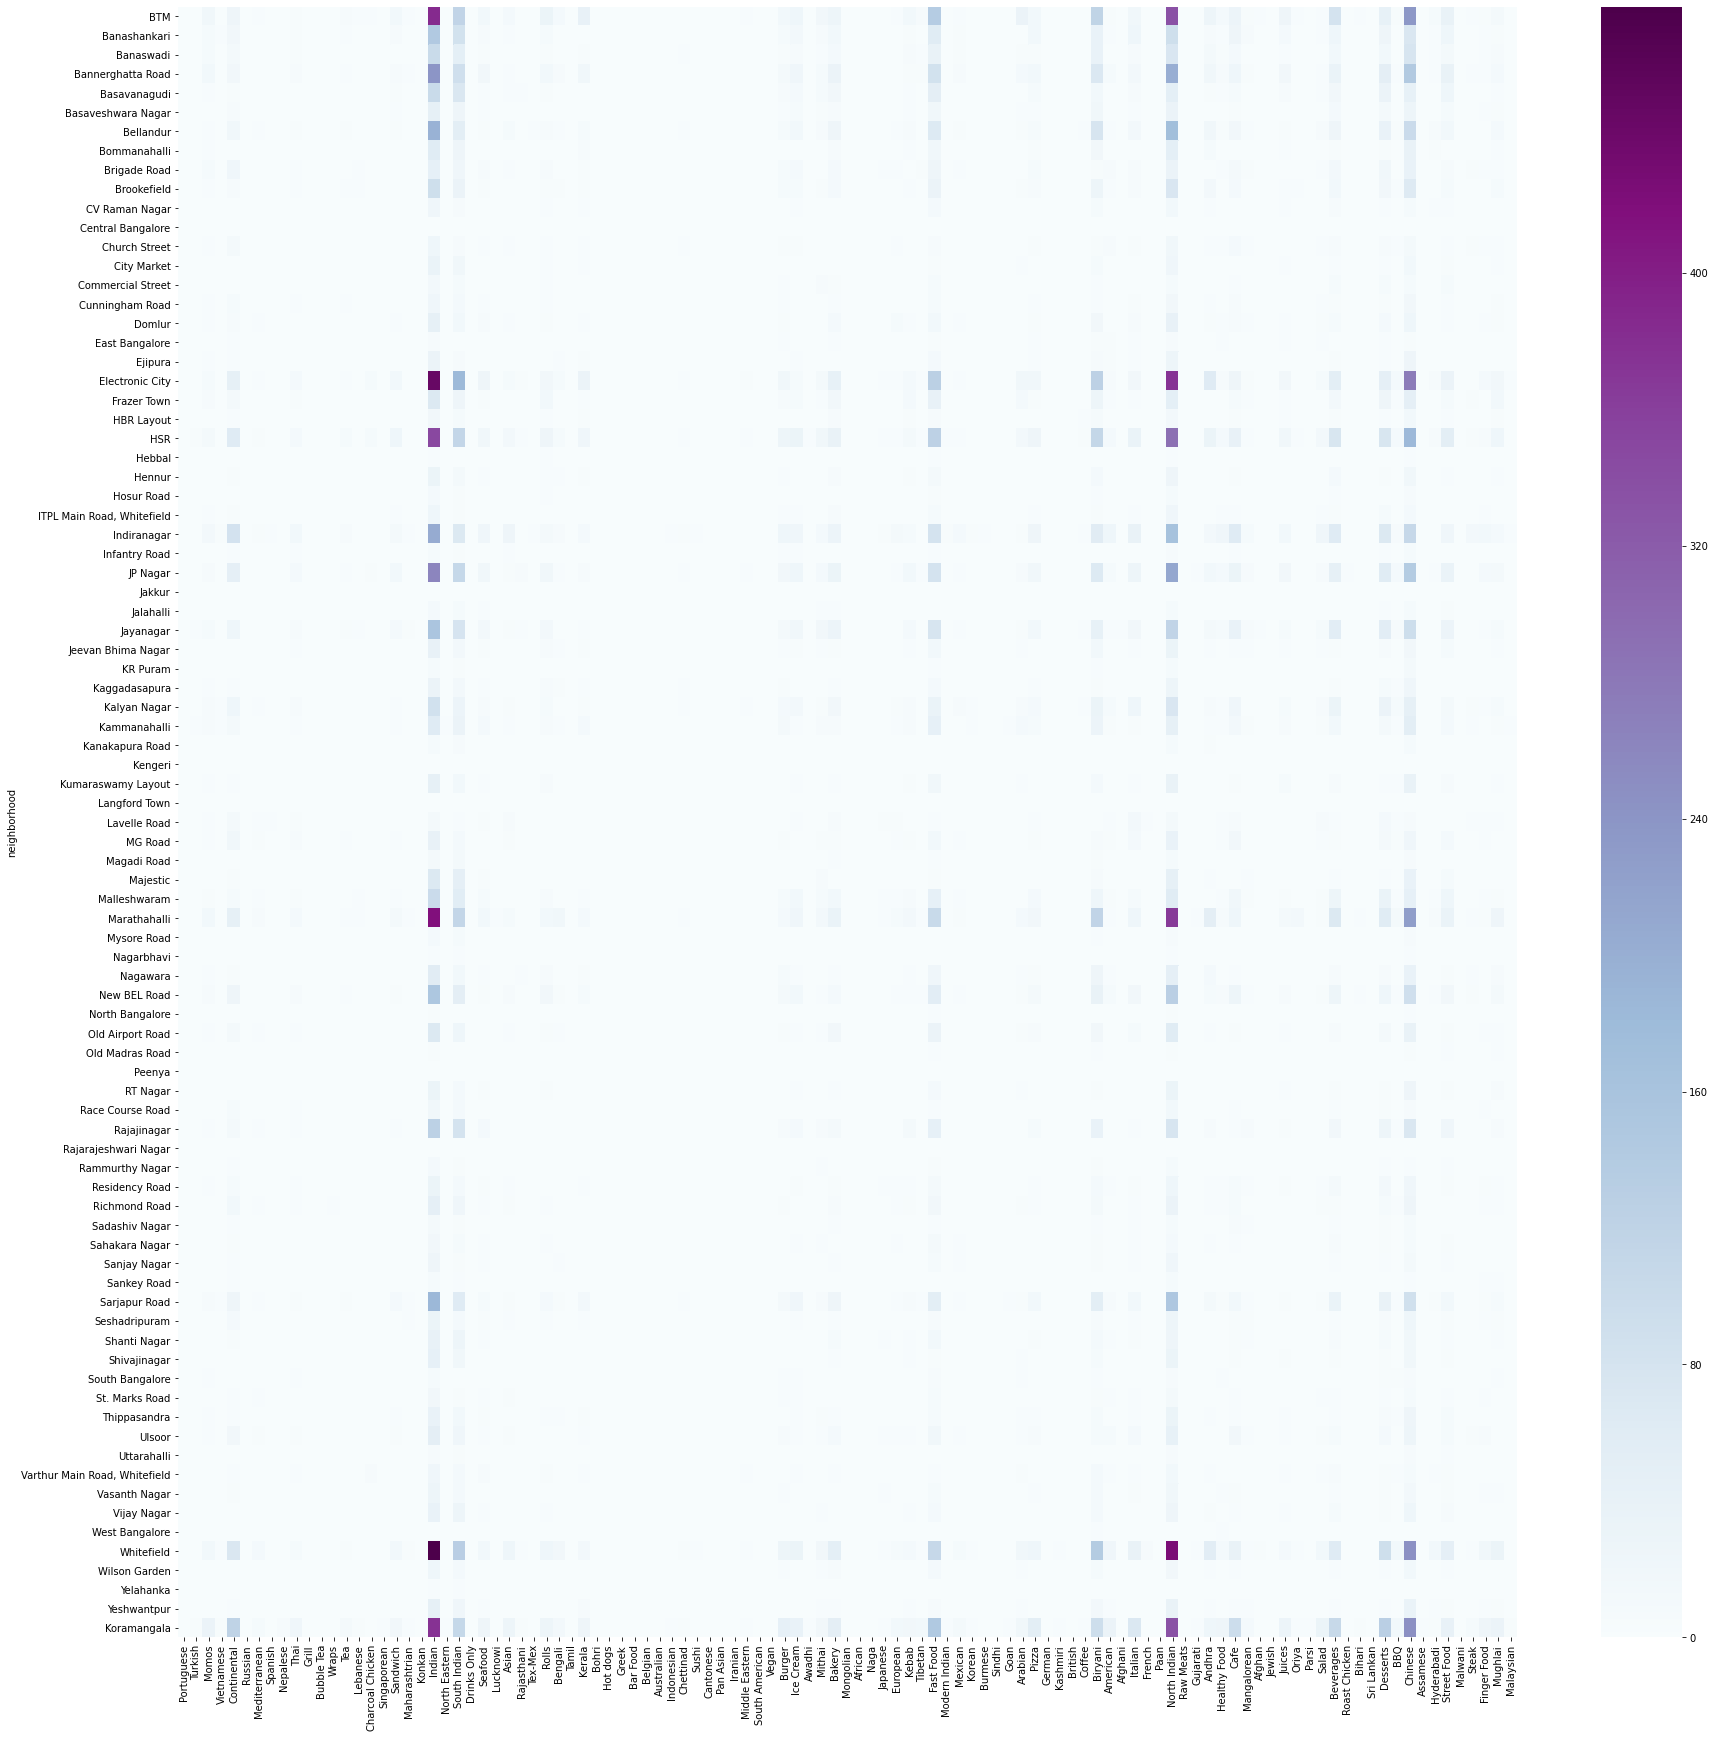

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(neighborhood_cns,cmap="BuPu")

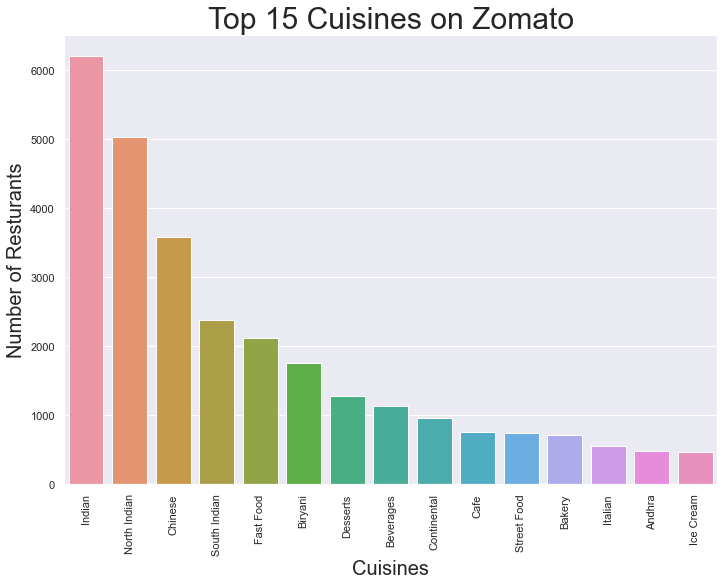

In [ ]:
#top 15 cuisines in bengaluru
Cuisine_data = pd.DataFrame(neighborhood_cns.sum(axis=0))
Cuisine_data.reset_index(inplace=True)
Cuisine_data.columns = ['Cuisines', 'Number of Resturants']
Top15= (Cuisine_data.sort_values(['Number of Resturants'],ascending=False)).head(15)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(Top15['Cuisines'], Top15['Number of Resturants'])
plt.xlabel('Cuisines', fontsize=20)
plt.ylabel('Number of Resturants', fontsize=20)
plt.title('Top 15 Cuisines on Zomato', fontsize=30)
plt.xticks(rotation = 90)
plt.show()

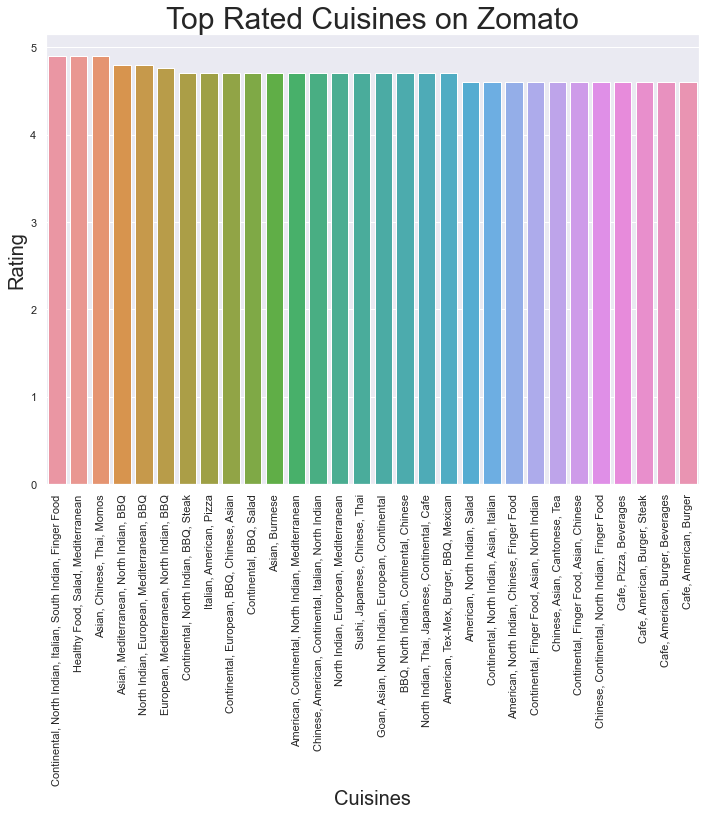

In [ ]:
Cuisine_data_rating=(rest_df.groupby(['cuisines'], as_index=False)['rate'].mean())
Cuisine_data_rating.columns = ['Cuisines', 'Rating']
Top30_ratings= (Cuisine_data_rating.sort_values(['Rating'],ascending=False)).head(30)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(Top30_ratings['Cuisines'], Top30_ratings['Rating'])
plt.title('Top Rated Cuisines on Zomato', fontsize=30)
plt.xlabel('Cuisines', fontsize=20)
plt.ylabel('Rating', fontsize=20)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#type of restaurant
listed = rest_df['listed_in(type)'].unique()
column_names = list(listed)
# instantiate the dataframe
neighborhood_lst = pd.DataFrame(columns=column_names)
neighborhood_lst

Empty DataFrame
Columns: [Buffet, Cafes, Delivery, Desserts, Dine-out, Drinks & nightlife, Pubs and bars]
Index: []

In [ ]:
neighborhood_lst['neighborhood'] = rest_df.groupby('location').groups.keys()
neighborhood_lst = neighborhood_lst.set_index('neighborhood').fillna(0)
neighborhood_lst

Buffet  Cafes  Delivery  Desserts  Dine-out  \
neighborhood                                                                 
BTM                                 0      0         0         0         0   
Banashankari                        0      0         0         0         0   
Banaswadi                           0      0         0         0         0   
Bannerghatta Road                   0      0         0         0         0   
Basavanagudi                        0      0         0         0         0   
Basaveshwara Nagar                  0      0         0         0         0   
Bellandur                           0      0         0         0         0   
Bommanahalli                        0      0         0         0         0   
Brigade Road                        0      0         0         0         0   
Brookefield                         0      0         0         0         0   
CV Raman Nagar                      0      0         0         0         0   
Central Bangalore                   0      0         0         0         0   
Church Street                       0      0         0         0         0   
City Market                         0      0         0         0         0   
Commercial Street                   0      0         0         0         0   
Cunningham Road                     0      0         0         0         0   
Domlur                              0      0         0         0         0   
East Bangalore                      0      0         0         0         0   
Ejipura                             0      0         0         0         0   
Electronic City                     0      0         0         0         0   
Frazer Town                         0      0         0         0         0   
HBR Layout                          0      0         0         0         0   
HSR                                 0      0         0         0         0   
Hebbal                              0      0         0         0         0   
Hennur                              0      0         0         0         0   
Hosur Road                          0      0         0         0         0   
ITPL Main Road, Whitefield          0      0         0         0         0   
Indiranagar                         0      0         0         0         0   
Infantry Road                       0      0         0         0         0   
JP Nagar                            0      0         0         0         0   
...                               ...    ...       ...       ...       ...   
Old Madras Road                     0      0         0         0         0   
Peenya                              0      0         0         0         0   
RT Nagar                            0      0         0         0         0   
Race Course Road                    0      0         0         0         0   
Rajajinagar                         0      0         0         0         0   
Rajarajeshwari Nagar                0      0         0         0         0   
Rammurthy Nagar                     0      0         0         0         0   
Residency Road                      0      0         0         0         0   
Richmond Road                       0      0         0         0         0   
Sadashiv Nagar                      0      0         0         0         0   
Sahakara Nagar                      0      0         0         0         0   
Sanjay Nagar                        0      0         0         0         0   
Sankey Road                         0      0         0         0         0   
Sarjapur Road                       0      0         0         0         0   
Seshadripuram                       0      0         0         0         0   
Shanti Nagar                        0      0         0         0         0   
Shivajinagar                        0      0         0         0         0   
South Bangalore                     0      0         0         0         0   
St. Marks Road                      0      0         

In [ ]:
i=0
for i in range(0,len(rest_df)):
    for x in listed:
        if type(rest_df.loc[i, 'listed_in(type)']) == str and x in rest_df.loc[i, 'listed_in(type)'] and type(rest_df.loc[i, 'location']) == str:
            neighborhood_lst.loc[rest_df.loc[i, 'location'], x] = neighborhood_lst.loc[rest_df.loc[i, 'location'], x]+1

In [ ]:
# Koramangala is divided into different block, lets combine them all
koramangala = ['Koramangala', 'Koramangala 1st Block', 'Koramangala 2nd Block', 'Koramangala 3rd Block', 'Koramangala 4th Block',
'Koramangala 5th Block', 'Koramangala 6th Block', 'Koramangala 7th Block', 'Koramangala 8th Block']
koramangala_dict = dict(neighborhood_lst.loc[koramangala].sum())
neighborhood_lst = neighborhood_lst.drop(koramangala)
neighborhood_lst.loc['Koramangala'] = koramangala_dict

C:\Users\Dinesh\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\Dinesh\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

C:\Users\Dinesh\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\Dinesh\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().

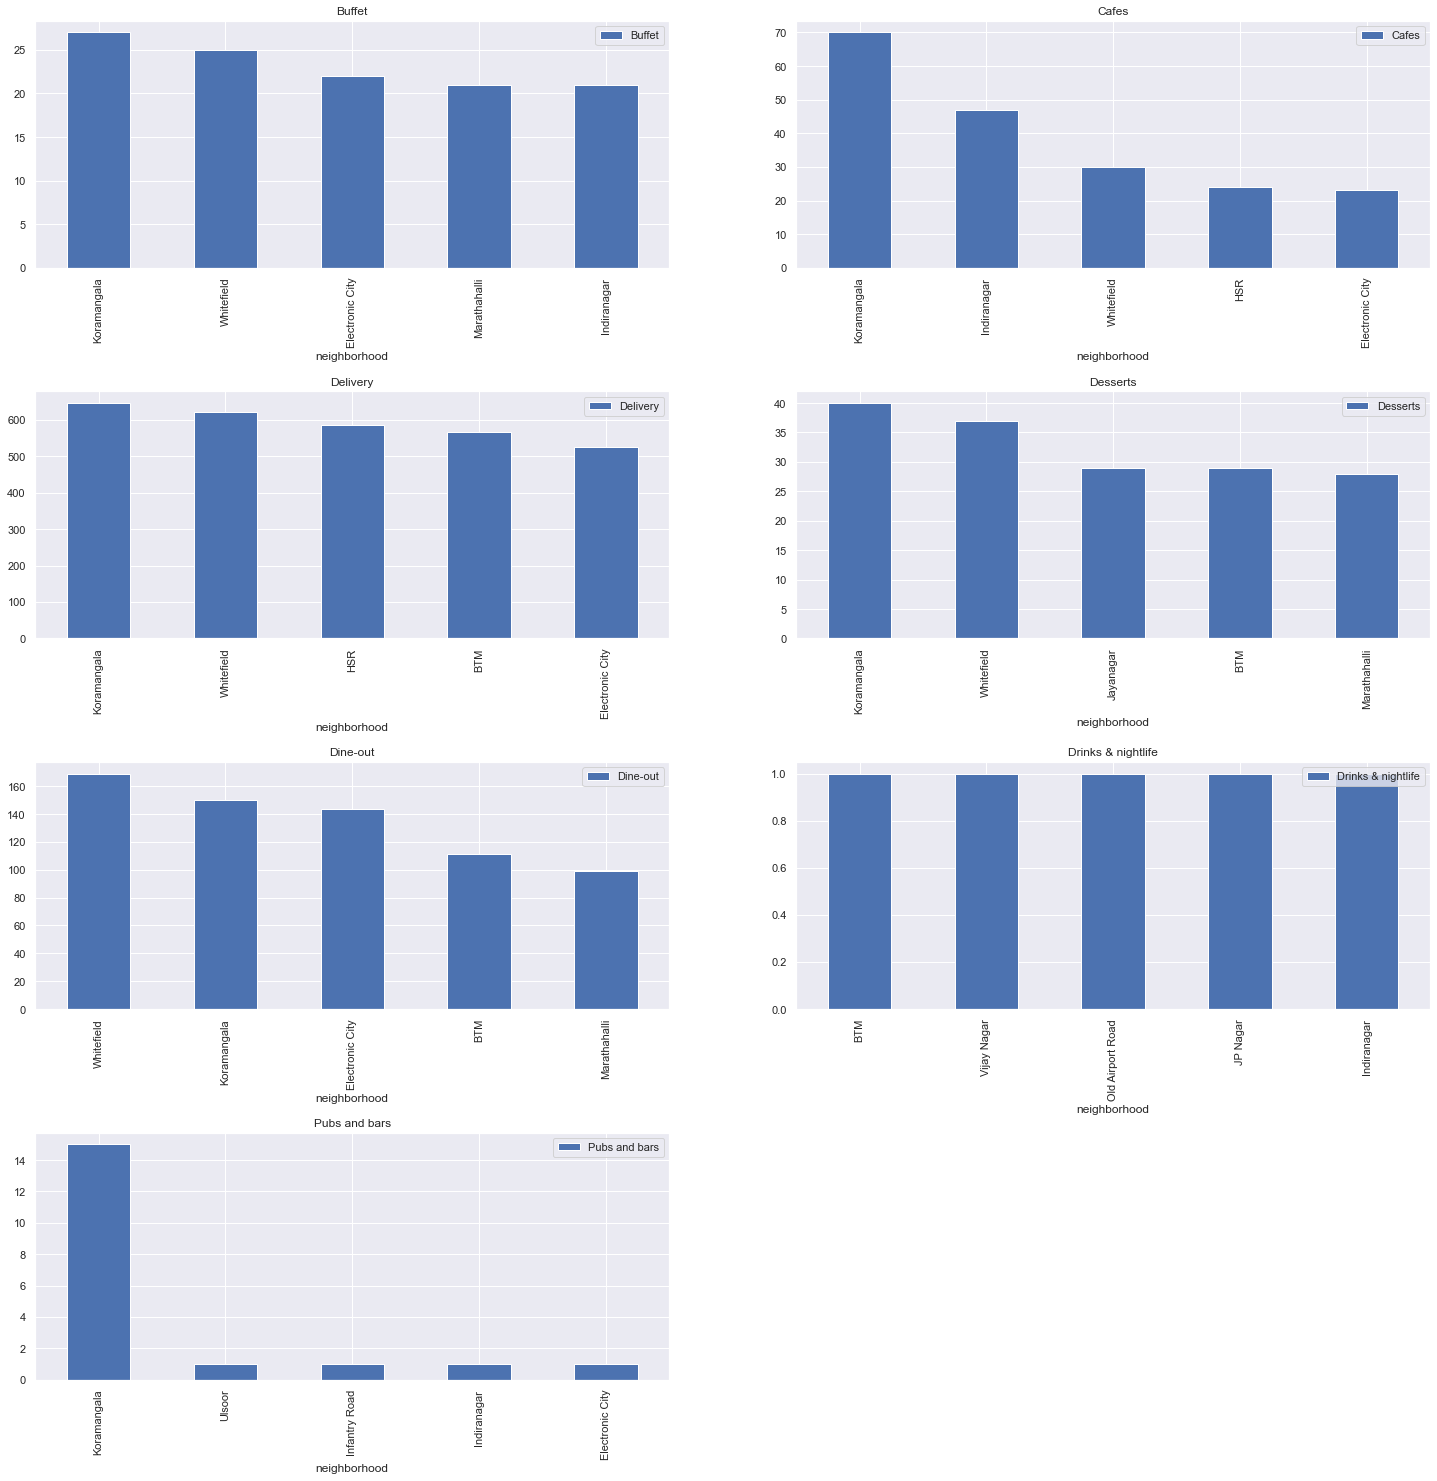

In [ ]:
category = neighborhood_lst.columns
fig, ax = plt.subplots(nrows=4, ncols=2, figsize = (25,25))
fig.delaxes(ax[3,1])

plt.subplots_adjust(wspace=0.2, hspace=0.5)
ax = ax.flatten()

for i in range(0,len(category)):
    d= neighborhood_lst[[category[i]]].sort_values(by=category[i], ascending=False).head()
    d.plot(ax=ax[i],kind='bar')
    ax[i].set_title(category[i])
    ax[i].set_xticklabels(d.index, rotation='vertical')

plt.show()

In [ ]:
#Clearly Koramangala has most number of Pubs and bars, With whitefield having the most number of Dine out restaurant,
#Koramangala with high number of Desserts restaurant, again koramangala and whitefield with large number of delivery restaurant,
#Koramangala and Indira nagar with large number of Cafes and Koramangala and Whittefield with higher buffet restaurants than others.

#It may not be wrong to conclude Koramangala as the hub of restaurants in Bengaluru.

Text(0, 0.5, 'Flights')

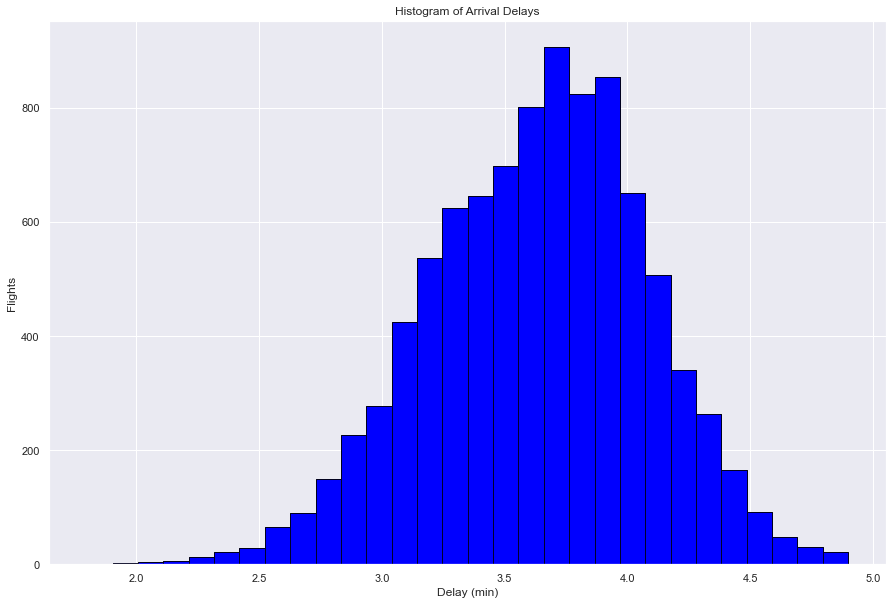

In [ ]:
### Restaurant rating distibution
data = rest_df['rate'].dropna()
# matplotlib histogram
plt.figure(figsize=(15,10))
plt.hist(data, color = 'blue', edgecolor = 'black',
         bins = 30)

# seaborn histogram
sns.distplot(data, hist=True, kde=False
             , color = 'blue',
             bins = 30,
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

In [ ]:

rest_df[rest_df['rate'] >= 4.8]
##Most of the High rated restaurants had North Indian Cuisine in their menu, moreover we can see that all the higher rated restaurant has higher cost of food too. However location does not play much important role here.


url  \
1994   https://www.zomato.com/bangalore/brahmins-coff...   
2087   https://www.zomato.com/bangalore/the-black-pea...   
2242   https://www.zomato.com/bangalore/byg-brewski-b...   
3036   https://www.zomato.com/bangalore/belgian-waffl...   
3917   https://www.zomato.com/bangalore/abs-absolute-...   
3918   https://www.zomato.com/bangalore/flechazo-whit...   
4269   https://www.zomato.com/bangalore/punjab-grill-...   
4906   https://www.zomato.com/bangalore/abs-absolute-...   
4917   https://www.zomato.com/bangalore/asia-kitchen-...   
5474   https://www.zomato.com/bangalore/belgian-waffl...   
5916   https://www.zomato.com/bangalore/house-of-comm...   
7425   https://www.zomato.com/bangalore/belgian-waffl...   
8302   https://www.zomato.com/bangalore/the-pizza-bak...   
8512   https://www.zomato.com/bangalore/milano-ice-cr...   
9014   https://www.zomato.com/bangalore/belgian-waffl...   
10311  https://www.zomato.com/bangalore/chilis-americ...   
10324  https://www.zomato.com/bangalore/punjab-grill-...   
10719  https://www.zomato.com/bangalore/o-g-variar-so...   
10887  https://www.zomato.com/bangalore/abs-absolute-...   
10888  https://www.zomato.com/bangalore/the-globe-gru...   
11167  https://www.zomato.com/bangalore/the-boozy-gri...   
11642  https://www.zomato.com/bangalore/sant%C3%A9-sp...   

                                                 address  \
1994   Ranga Rao Road, Near Shankar Mutt, Shankarapur...   
2087   20/7, Swamy Legato, Outer Ring Road, Kadubeesa...   
2242          Behind MK Retail, Sarjapur Road, Bangalore   
3036   65, Markham Road, Ashok Nagar, Brigade Road, B...   
3917   2nd Floor, I20-A2, EPIP Zone, Near Vydehi Hosp...   
3918   120 A3, 2nd Floor, Santosh Tower, EPIP Industr...   
4269   Ground Floor, Forum Shantiniketan, Whitefield ...   
4906   100 Feet Road, 1st Phase, Near Jayadeva Flyove...   
4917   136, Ground Floor, 1st Cross, 5th Block, Jyoti...   
5474   13 KHB Colony, 17th Main, M.I.G, Koramangala 5...   
5916   122/B, Jyothi Nivas Road, 5th Block, Koramanga...   
7425                            Vasanth Nagar, Bangalore   
8302   2985, 12th Main, HAL 2nd Stage, Indiranagar, B...   
8512   460, 2nd Cross, Krishna Temple Road, Indiranag...   
9014   5M/406, Ground Floor, 2nd Block extension, Hen...   
10311  2nd Floor, Orion Mall, Dr. Rajkumar Road, Mall...   
10324  26/1, Dr Rajkumar Road, Brigade Gateway Campus...   
10719       12th Main, 2nd Block, Rajajinagar, Bangalore   
10887  90/4, 3rd Floor, Outer Ring Road, Munnekollaly...   
10888  2nd Floor, Soul Space Paradigm, Above Bata Sho...   
11167  20/7, 4th & 5th Floor, Swamy Legato, Outer Rin...   
11642  151, 2nd Cross, Domlur 2nd Stage, Indiranagar,...   

                                                    name online_order  \
1994                                Brahmin's Coffee Bar           No   
2087                                     The Black Pearl           No   
2242                         Byg Brewski Brewing Company          Yes   
3036                              Belgian Waffle Factory          Yes   
3917                           AB's - Absolute Barbecues           No   
3918                                            Flechazo           No   
4269                                        Punjab Grill          Yes   
4906                           AB's - Absolute Barbecues           No   
4917                      Asia Kitchen By Mainland China          Yes   
5474                              Belgian Waffle Factory          Yes   
5916                                    House Of Commons           No   
7425                              Belgian Waffle Factory          Yes   
8302                                    The Pizza Bakery          Yes   
8512                                    Milano Ice Cream           No   
9014                              Belgian Waffle Factory          Yes   
10311                       Chili's American Grill & Bar          Yes   
10324                                       Punjab

Text(0.5, 0, 'Cost for two people')

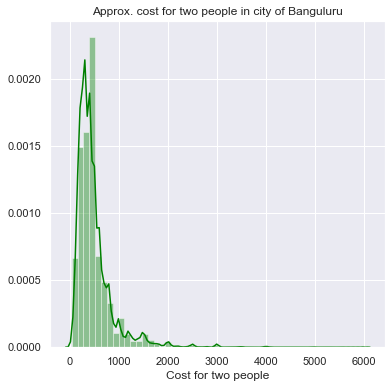

In [ ]:
cost= rest_df['approx_cost(for two people)']
cost= cost.dropna().apply(lambda x : int(x.replace(',', '')))
plt.figure(figsize=(6,6))
sns.set_style('darkgrid')
sns.distplot(cost, color= 'green')
plt.title('Approx. cost for two people in city of Banguluru')
plt.xlabel('Cost for two people')

Text(0, 0.5, 'Approx. cost for 2 people')

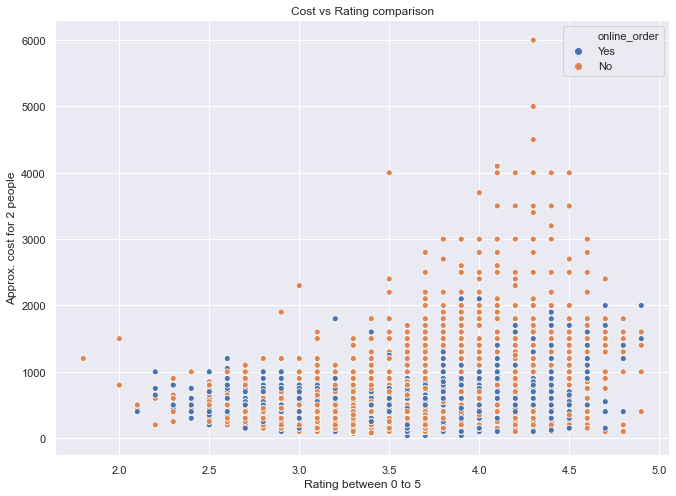

In [ ]:
crdf= rest_df[['rate', 'approx_cost(for two people)', 'online_order']].dropna()
crdf['rate']= crdf['rate']
crdf['approx_cost(for two people)']= crdf['approx_cost(for two people)'].apply(lambda x : int(x.replace(',', '')))

plt.figure(figsize=(11, 8))
sns.set_style('darkgrid')
sns.scatterplot( x= 'rate', y = 'approx_cost(for two people)', hue= 'online_order', data= crdf )
plt.title('Cost vs Rating comparison')
plt.xlabel('Rating between 0 to 5')
plt.ylabel('Approx. cost for 2 people')

In [ ]:
#### Cuisine  and rating of a resaurant
###Does having more number of cuisine mean higher rating of the restaurant
def fun(x):
    if(type(x) == list):
        return (len(x))
    else:
        return 0
rest_df['no_of_cuisine'] = rest_df['cuisines'].str.split(',').apply(fun)


In [ ]:
rest_df.groupby(['no_of_cuisine'])['rate'].mean()

no_of_cuisine
0    3.400000
1    3.585200
2    3.589325
3    3.621504
4    3.737044
5    3.790373
6    3.921359
7    3.915517
8    3.768571
Name: rate, dtype: float64

In [ ]:
rest_df.drop('no_of_cuisine', axis=1, inplace=True)
##Yes it can be seen that retaurants having more number of cuisines are rated higher
#### So is there a particular cuisine in a restaurant that makes the restaurant rated higher

In [ ]:
cuisine = set()
def func(x):
    if(type(x) == list):
        for y in x:
            cuisine.add(y.strip())
_ = rest_df['cuisines'].str.split(',').apply(func)

In [ ]:
cui_df = rest_df[['name', 'location', 'rate', 'cuisines']]
column_names = list(cuisine)
# instantiate the dataframe
cui_df = pd.concat([cui_df, pd.DataFrame(columns=column_names)], axis=1)
cui_df.loc[:, ~cui_df.columns.isin(['name', 'location', 'rate', 'cuisines'])] = cui_df.loc[:, ~cui_df.columns.isin(['name', 'location', 'rate', 'cuisines'])].fillna(0)
cui_df

name  \
0                                                  Jalsa   
1                                         Spice Elephant   
2                                        San Churro Cafe   
3                                  Addhuri Udupi Bhojana   
4                                          Grand Village   
5                                        Timepass Dinner   
6        Rosewood International Hotel - Bar & Restaurant   
7                                                 Onesta   
8                                         Penthouse Cafe   
9                                              Smacznego   
10     CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...   
11                                          Cafe Shuffle   
12                                      The Coffee Shack   
13                                            Caf-Eleven   
14                                         Cafe Vivacity   
15                                          Catch-up-ino   
16                                      Kirthi's Biryani   
17                                              T3H Cafe   
18                         360 Atoms Restaurant And Cafe   
19                                      The Vintage Cafe   
20                                          Woodee Pizza   
21                                       Cafe Coffee Day   
22                                          My Tea House   
23                                         Hide Out Cafe   
24                                             CAFE NOVA   
25                                          Coffee Tindi   
26                                        Sea Green Cafe   
27                                                 Cuppa   
28                                      Srinathji's Cafe   
29                                             Redberrys   
...                                                  ...   
12469                                       Black Pagoda   
12470                              Noodle And Soup Point   
12471                                           Food Dig   
12472                                          Ishwaryam   
12473                                         Hungry Wok   
12474                                        Get Grilled   
12475                                       Thindi Sante   
12476                                       Hotel Devika   
12477                              Basaveshwara Kanawali   
12478                                    Sri Udupi Grand   
12479                                 SM Bangarpet Chats   
12480                                        Mad Kitchen   
12481                                             V Dine   
12482                                    Polly's Kitchen   
12483                                    The Yellow Stop   
12484                                 Arabian Fame Grill   
12485                                      Roll Junction   
12486                                 Shrawan Restaurant   
12487                        Calcutta North Indian Meals   
12488                                            Chianti   
12489  Chime - Sheraton Grand Bengaluru Whitefield Ho...   
12490                       The Nest - The Den Bengaluru   
12491                                          Chung Wah   
12492                                      Nawabs Empire   
12493                                     Fujian Express   
12494                                 New Shalimar Hotel   
12495        Nook - Aloft Bengaluru Cessna Business Park   
12496                                   SeeYa Restaurant   
12497                                            Bhagini   
12498  Plunge - Sheraton Grand Bengaluru Whitefield H...   

                         location  rate  \
0                    Banashankari   4.1   
1                    Banashankari   4.1   
2                    Banashankari   3.8   
3                    Banashankari   3.7   
4                    Basavanagudi   3.8   
5                    Basavanagudi   3.8   
6                     Mysore R

In [ ]:
for i in range(0, len(cui_df)):
    for x in cuisine:
        if type(cui_df.loc[i, 'cuisines']) == str and x in cui_df.loc[i, 'cuisines']:
            cui_df.loc[i, x] = cui_df.loc[i, x]+1

In [ ]:
def set_pandas_options() -> None:
    pd.options.display.max_columns = 20
    pd.options.display.max_rows = 75
    pd.options.display.max_colwidth = 199
    pd.options.display.width = None
    # pd.options.display.precision = 2  # set as needed

set_pandas_options()

In [ ]:
cui_df.groupby('rate').sum().tail(10).T

rate              4.0  4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9
Portuguese          0    1    0    1    0    0    0    0    0    0
Turkish             2    3    2    4    0    1    0    0    0    0
Momos              21   11   10   16    6    4    0    1    0    1
Vietnamese          7    4    0    2    5    2    1    0    0    0
Continental        80   93   76   59   41   26    8   11    3    1
Russian             0    0    1    0    0    0    0    0    0    0
Mediterranean       6    7   14   10    8    6    2    7    3    3
Spanish             1    0    2    2    0    0    1    0    0    0
Nepalese            1    0    3    0    0    0    0    0    0    0
Thai               24   15   11   11   12    7    2    2    0    1
Grill               1    0    0    0    0    0    0    0    0    0
Bubble Tea          0    1    0    0    0    0    0    0    0    0
Wraps               0    4    1    0    0    0    0    0    0    0
Tea                 4    3    3    1    2    0    1    0    0    0
Lebanese            1    1    3    1    0    1    0    0    0    0
Charcoal Chicken    1    0    0    0    0    0    0    0    0    0
Singaporean         0    0    1    1    3    1    1    0    0    0
Sandwich           18   12   12    4    9    3    1    0    0    0
Maharashtrian       4    3    2    0    0    1    0    0    0    0
Konkan              0    3    1    1    2    1    0    0    0    0
Indian            263  212  126  101   75   38   14   17    6    5
North Eastern       0    0    1    1    0    0    0    0    0    0
South Indian       88   64   33   35   13    9    3    2    1    1
Drinks Only         0    0    0    0    0    0    0    0    0    0
Seafood            19   29   19    8   12    5    2    0    0    0
Lucknowi            2    0    0    0    0    1    0    0    0    0
Asian              13   21   28   22   23    6    7    6    2    2
Rajasthani          4    3    2    3    0    0    0    0    0    0
Tex-Mex             0    1    0    1    0    1    1    0    1    0
Rolls              17    7    1    1    2    1    0    0    0    0
Bengali            10    2    1    2    1    0    0    0    0    0
Tamil               0    0    0    0    0    0    0    0    0    0
Kerala              9    7    6    2    1    1    0    0    0    0
Bohri               0    0    0    0    0    0    0    0    0    0
Hot dogs            0    0    0    0    0    0    0    0    0    0
Greek               1    0    1    0    0    0    0    0    0    0
Bar Food            0    0    0    1    0    0    0    0    0    0
...               ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
Kashmiri            1    0    0    0    0    0    0    0    0    0
British             0    0    1    1    0    0    0    0    0    0
Coffee              2    3    1    2    0    0    0    0    0    0
Biryani            68   36   26   19   12    4    1    0    0    0
American           25   32   16   14   10    9    7    5    1    0
Afghani             0    1    0    0    0    0    0    0    0    0
Italian            52   69   46   41   24   16   10    5    2    1
French              2    3    2    3    2    1    0    0    0    0
Paan                0    0    0    0    0    0    0    0    0    0
North Indian      226  178  110   78   63   31   13   14    5    5
Raw Meats           0    0    0    0    0    0    0    0    0    0
Gujarati            3    1    0    0    0    0    0    0    0    0
Andhra             21    8   12    7    3    0    0    0    0    0
Healthy Food        9   18    9    9    7    3    1    0    0    1
Cafe               65   69   59   43   26   12    9    4    0    0
Mangalorean         4   12    5    4    4    2    1    0    0    0
Afghan              2    3    1    0    0    0    0    0    0    0
Jewish              0    0    0    1    0    0    0    0    0    0
Juices             14   10    4    3    0    0    2    0    0    0
Oriya               0    0    0    0    0    0    0    0    0    0
Parsi               0    0    0    0    1    0 

In [ ]:
#After analysing the data it was found that these type of cuisines were very highly rated <i>Goa, Seafood, Korean, African,Fast Food, Biryani, Chinese, Continental, Thai, Sushi, Sindhi, Portuguese, Turkish, Naga, Jewish,
#Rajasthani, BBQ, Sandwich, Momos, Andhra, Steak, Tex-Mex, Arabian, Rolls, Healthy Food, Desserts, Finger Food, Pizza, Vietnamese
#Italian, Mediterranean, Kebab, American, Japanese, Mexican, Indonesian, Burmese, European, French, Malaysian, Asian, Mughlai, Burger,
#Iranian</i> but among these <b>American, Italian, Pizza, Biryani, Continental, Chinese, Seafood, Korean</b> were much highly rated. Though North Indian, South Indian, Ice Cream, Mangalorean Beverages, Street Food, Cafe, Indian were the top rated but it is quite obvious for such type of restaurant to be at the top.

In [ ]:
### Lets find out which neighborhood is famous for what type of cuisine
# Now can we say whcih neighborhood is famous for what type of food or cuisine
cuisine_grouped = cui_df.groupby('location').sum()
cuisine_grouped

rate  Portuguese  Turkish  Momos  Vietnamese  \
location                                                                        
BTM                            1842.5           0        1     19           0   
Banashankari                    823.1           0        0      9           2   
Banaswadi                       507.7           0        0      8           1   
Bannerghatta Road              1216.6           0        0     15           1   
Basavanagudi                    650.5           0        0      2           0   
Basaveshwara Nagar              240.9           0        0      1           0   
Bellandur                       907.8           0        1      3           0   
Bommanahalli                    173.8           0        0      2           0   
Brigade Road                    397.0           0        0      8           0   
Brookefield                     499.8           0        0      3           0   
CV Raman Nagar                  101.5           0        0      1           0   
Central Bangalore                 3.7           0        0      0           0   
Church Street                   210.5           0        0      3           0   
City Market                      74.6           0        0      0           0   
Commercial Street               121.2           0        0      1           0   
Cunningham Road                 175.6           0        0      2           0   
Domlur                          260.3           0        0      2           0   
East Bangalore                   48.5           0        0      0           0   
Ejipura                         118.1           0        0      3           0   
Electronic City                1590.3           0        0      9           1   
Frazer Town                     522.9           0        0      6           1   
HBR Layout                       91.6           0        0      1           0   
HSR                            1881.2           0        4     13           0   
Hebbal                           14.4           0        0      0           0   
Hennur                          162.5           0        0      1           0   
Hosur Road                       38.1           0        0      0           0   
ITPL Main Road, Whitefield      121.7           0        0      3           0   
Indiranagar                    1645.1           1        1     14           5   
Infantry Road                    48.8           0        0      0           1   
JP Nagar                       1352.1           0        0      7           0   
Jakkur                            0.0           0        0      0           0   
Jalahalli                        52.2           0        0      0           0   
Jayanagar                      1150.8           0        2      9           1   
Jeevan Bhima Nagar              245.7           0        1      1           0   
KR Puram                         28.4           0        0      1           0   
Kaggadasapura                   174.5           0        0      3           0   
Kalyan Nagar                    706.6           0        0      6           2   
...                               ...         ...      ...    ...         ...   
Marathahalli                   1758.2           0        1     15           1   
Mysore Road                      29.1           0        0      0           0   
Nagarbhavi                        3.4           0        0      0           0   
Nagawara                        297.2           0        0      2           0   
New BEL Road                    801.3           0        1      7           1   
North Bangalore                  13.5           0        0      0           0   
Old Airport Road                392.5           0        0      3           0   
Old Madras Road                  30.2           0        0      1           0   
Peenya                            3.2           0        0      0           0   
RT Nagar                        139.0           0        1      

In [ ]:
##### Lets print the top 5 cuisine famous in each of the neighborhood
num_top_venues = 5
for hood in cuisine_grouped.index:
    print("----"+hood+"----")
    temp = cuisine_grouped[cuisine_grouped.index == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----BTM----
          venue   freq
0        Indian  385.0
1  North Indian  335.0
2       Chinese  236.0
3     Fast Food  138.0
4       Biryani  118.0


----Banashankari----
          venue   freq
0        Indian  144.0
1  North Indian   93.0
2  South Indian   85.0
3       Chinese   71.0
4     Fast Food   60.0


----Banaswadi----
          venue   freq
0        Indian  101.0
1       Chinese   77.0
2  North Indian   74.0
3  South Indian   49.0
4     Fast Food   38.0


----Bannerghatta Road----
          venue   freq
0        Indian  239.0
1  North Indian  200.0
2       Chinese  143.0
3  South Indian   91.0
4     Fast Food   85.0


----Basavanagudi----
          venue   freq
0        Indian  101.0
1  South Indian   72.0
2     Fast Food   52.0
3  North Indian   50.0
4       Chinese   42.0


----Basaveshwara Nagar----
          venue  freq
0        Indian  45.0
1  North Indian  32.0
2       Chinese  27.0
3  South Indian  25.0
4       Biryani  19.0


----Bellandur----
          venue   freq


          venue  freq
0        Indian  99.0
1  North Indian  60.0
2  South Indian  57.0
3       Chinese  43.0
4     Fast Food  43.0


----Marathahalli----
          venue   freq
0        Indian  418.0
1  North Indian  367.0
2       Chinese  227.0
3       Biryani  116.0
4  South Indian  113.0


----Mysore Road----
          venue  freq
0        Indian  11.0
1  South Indian   9.0
2  North Indian   7.0
3       Chinese   6.0
4       Biryani   3.0


----Nagarbhavi----
          venue  freq
0       Chinese   3.0
1  South Indian   3.0
2        Indian   3.0
3  North Indian   2.0
4         Rolls   1.0


----Nagawara----
          venue  freq
0        Indian  59.0
1  North Indian  48.0
2       Chinese  37.0
3       Biryani  26.0
4     Fast Food  21.0


----New BEL Road----
          venue   freq
0        Indian  152.0
1  North Indian  129.0
2       Chinese   90.0
3     Fast Food   55.0
4  South Indian   51.0


----North Bangalore----
          venue  freq
0  North Indian   4.0
1        Indian   

In [ ]:
#### Rating and Cuisine
#### Is there any cuisine which is always rated high
cui_df
# Now lets plot box plot based on the cost of food
bins = pd.IntervalIndex.from_tuples([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)])
cui_df['rate_cat'] = pd.cut(cui_df['rate'], bins)
cui_df['rate_cat'] = cui_df['rate_cat'].astype(str)
cui_df['rate_cat'] = cui_df['rate_cat'].map({'(0.0, 1.0]' : 1, '(1.0, 2.0]' : 2, '(2.0, 3.0]' : 3, '(3.0, 4.0]' : 4, '(4.0, 5.0]' : 5 })

In [ ]:
ra_cu = cui_df.groupby(['rate_cat']).sum()
ra_cu

rate  Portuguese  Turkish  Momos  Vietnamese  Continental  \
rate_cat                                                                 
2.0           5.8           0        0      0           0            1   
3.0        2492.5           0        0     23           3           35   
4.0       25036.6           0        8    174          14          467   
5.0        6241.3           2       10     49          14          318   

          Russian  Mediterranean  Spanish  Nepalese  ...  BBQ  Chinese  \
rate_cat                                             ...                 
2.0             0              0        0         0  ...    0        2   
3.0             0              1        0         0  ...    1      395   
4.0             0             25        3         6  ...   65     2149   
5.0             1             60        5         3  ...   60      290   

          Assamese  Hyderabadi  Street Food  Malwani  Steak  Finger Food  \
rate_cat                                                                   
2.0              0           0            0        0      0            1   
3.0              0          15           72        0      1            7   
4.0              2          49          465        0     37           75   
5.0              1           5           68        0     37           76   

          Mughlai  Malaysian  
rate_cat                      
2.0             0          0  
3.0            36          1  
4.0           197          3  
5.0            72         14  

[4 rows x 108 columns]

----2.0----
        cuisine  freq
0       Chinese   2.0
1  North Indian   2.0
2        Indian   2.0
3        Andhra   1.0
4   Finger Food   1.0


----3.0----
        cuisine   freq
0        Indian  527.0
1  North Indian  483.0
2       Chinese  395.0
3     Fast Food  183.0
4       Biryani  155.0


----4.0----
        cuisine    freq
0        Indian  3473.0
1  North Indian  2872.0
2       Chinese  2149.0
3  South Indian  1323.0
4     Fast Food  1289.0


----5.0----
        cuisine   freq
0        Indian  594.0
1  North Indian  497.0
2   Continental  318.0
3       Chinese  290.0
4      Desserts  255.0




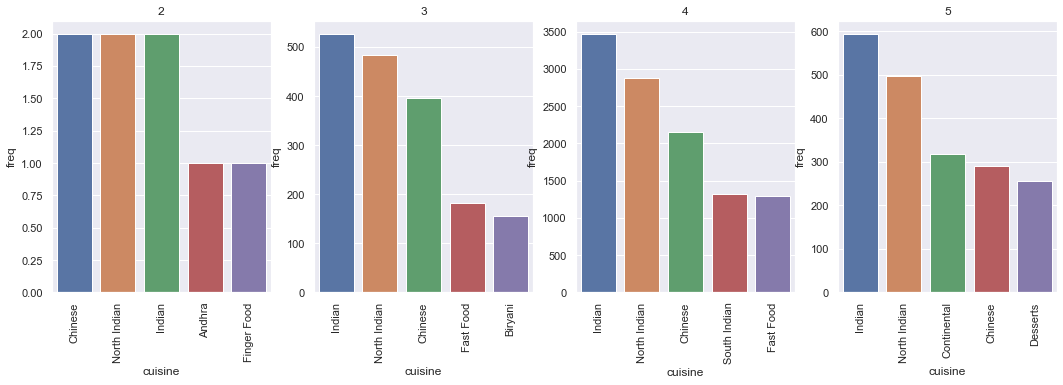

In [ ]:
num_top_venues = 5
f, ax = plt.subplots(1,4, figsize = (18,5))
i = 2
for hood in ra_cu.index:
    print("----"+str(hood)+"----")
    temp = ra_cu[ra_cu.index == hood].T.reset_index()
    temp.columns = ['cuisine','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    sns.barplot(y = 'freq', x = 'cuisine', data = temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues), ax = ax[i-2],)
    ax[i-2].set_title(str(i))
    ax[i-2].set_xticklabels(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues).cuisine, rotation='vertical')
    i+=1
plt.show()

In [ ]:
##Indian, North Indian, Chinese tough were common among the ratings but Most of the continental Cuisine restaurant were rated high which was also evident from the data, and not to forget there are large number of desserts restaurant

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
### Are ratings affected by how cheap/expensive a restaurant is ?
data = [
    go.Scatter(x = rest_df['approx_cost(for two people)'],
              y = rest_df['rate'],
              mode = "markers",
               text = rest_df['name'],
               marker = dict(opacity = 0.7,
                            size = 10,
                            color = rest_df['rate'], #Set color equalivant to rating
                            colorscale= 'Viridis',
                            showscale=True,
                             maxdisplayed=2500,
                            ),
                hoverinfo="text+x+y",
              )
]
layout = go.Layout(autosize=True,
                   xaxis=dict(title="Average Cost of Two (INR)",
                             #titlefont=dict(size=20,),
                             #tickmode="linear",
                             ),
                   yaxis=dict(title="Rating",
                             #titlefont=dict(size=17,),
                             ),
                  )
iplot(dict(data=data, layout=layout))

In [ ]:
##As it seems, from a quick glance, there is no obseravable linear relationship. At almost every price point, there appears to be both Good and Bad restaurants.
##Not wasting our time further lets carry out statistical analysis pearson correlation on it.<br>
##<b>Null Hypothesis</b> : There is no relationship between the rating and price of the restaurant<br>
##<b>Alternate Hypothesis</b> : There is some relationship between the two


In [ ]:
pear = rest_df.dropna(subset=['approx_cost(for two people)', 'rate'])

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(pear['approx_cost(for two people)'], pear['rate'])
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results

AttributeError: 'str' object has no attribute 'conjugate'

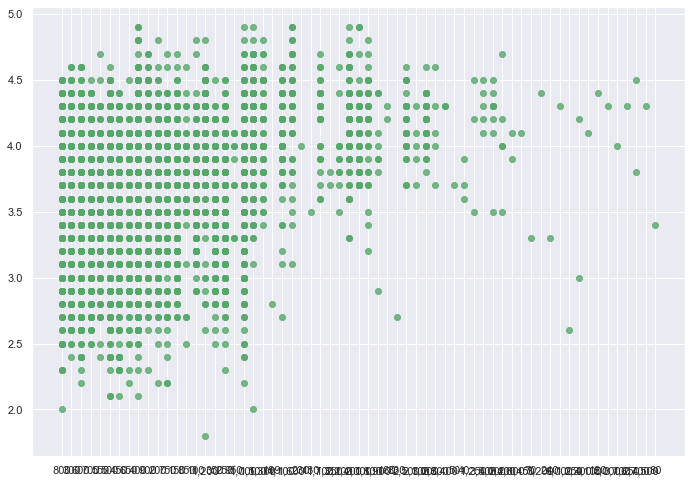

In [ ]:
ax = sns.regplot(x=pear['approx_cost(for two people)'], y=pear['rate'], color="g")

In [ ]:
pear = rest_df.dropna(subset=['votes', 'rate'])

In [ ]:
pearson_coef, p_value = stats.pearsonr(pear['votes'], pear['rate'])
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results

Pearson Correlation Coefficient:  0.39943342881574956 and a P-value of: 0.0


In [ ]:
##The p-value shows result is significant. And hence we reject our NULL hypothesis and accept the Alternate Hypothesis i.e both the variables are related and our finding was statistically significant

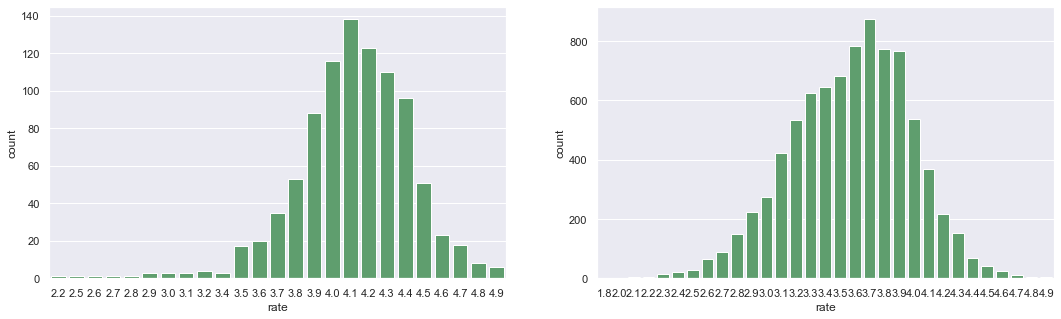

In [ ]:
### Are restaurants that offer Table booking option rated higher?
pear = rest_df[rest_df['book_table'] == 'Yes']
f, ax = plt.subplots(1,2, figsize = (18,5))
sns.countplot(pear['rate'], color="g", ax=ax[0])
pear = rest_df[rest_df['book_table'] == 'No']
sns.countplot(pear['rate'], color="g",  ax=ax[1])
plt.show()

In [ ]:
model = smf.ols(formula='rate ~ C(book_table)', data=rest_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     1533.
Date:                Thu, 16 Apr 2020   Prob (F-statistic):          1.77e-310
Time:                        22:03:45   Log-Likelihood:                -4679.6
No. Observations:                9316   AIC:                             9363.
Df Residuals:                    9314   BIC:                             9377.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.5718 

In [ ]:
#***************************************Cluster Neighborhoods****************************************************
## Now lets use ML to cluster neighborhoods by their food style
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [ ]:
cuisine = set()
def func(x):
    if(type(x) == list):
        for y in x:
            cuisine.add(y.strip())
_ = rest_df['cuisines'].str.split(',').apply(func)
cui_df = rest_df[['name', 'location', 'rate', 'cuisines']]
column_names = list(cuisine)
# instantiate the dataframe
cui_df = pd.concat([cui_df, pd.DataFrame(columns=column_names)], axis=1)
cui_df.loc[:, ~cui_df.columns.isin(['name', 'location', 'rate', 'cuisines'])] = cui_df.loc[:, ~cui_df.columns.isin(['name', 'location', 'rate', 'cuisines'])].fillna(0)
cui_df

name  \
0                                                        Jalsa   
1                                               Spice Elephant   
2                                              San Churro Cafe   
3                                        Addhuri Udupi Bhojana   
4                                                Grand Village   
5                                              Timepass Dinner   
6              Rosewood International Hotel - Bar & Restaurant   
7                                                       Onesta   
8                                               Penthouse Cafe   
9                                                    Smacznego   
10          CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley   
11                                                Cafe Shuffle   
12                                            The Coffee Shack   
13                                                  Caf-Eleven   
14                                               Cafe Vivacity   
15                                                Catch-up-ino   
16                                            Kirthi's Biryani   
17                                                    T3H Cafe   
18                               360 Atoms Restaurant And Cafe   
19                                            The Vintage Cafe   
20                                                Woodee Pizza   
21                                             Cafe Coffee Day   
22                                                My Tea House   
23                                               Hide Out Cafe   
24                                                   CAFE NOVA   
25                                                Coffee Tindi   
26                                              Sea Green Cafe   
27                                                       Cuppa   
28                                            Srinathji's Cafe   
29                                                   Redberrys   
30                                                  Foodiction   
31                                                 Sweet Truth   
32                                             Ovenstory Pizza   
33                                                      Faasos   
34                                             Behrouz Biryani   
35                                              Fast And Fresh   
36                                             Szechuan Dragon   
...                                                        ...   
12462                                                  Tuk-Tuk   
12463                                         New Udupi Upahar   
12464                                       Hotel Royal Darbar   
12465                                          Taste of Kerala   
12466                                             Nethra Hotel   
12467                                       A1 Hot Dum Biryani   
12468                                   Real Ambur Dum Biryani   
12469                                             Black Pagoda   
12470                                    Noodle And Soup Point   
12471                                                 Food Dig   
12472                                                Ishwaryam   
12473                                               Hungry Wok   
12474                                              Get Grilled   
12475                                             Thindi Sante   
12476                                             Hotel Devika   
12477                                    Basaveshwara Kanawali   
12478                                          Sri Udupi Grand   
12479                                       SM Bangarpet Chats   
12480                                              Mad Kitchen   
12481                                                   V Dine   
12482                                          Polly's Kitchen   
12483                                          The Yellow Stop   
12484                           

In [ ]:
for i in range(0, len(cui_df)):
    for x in cuisine:
        if type(cui_df.loc[i, 'cuisines']) == str and x in cui_df.loc[i, 'cuisines']:
            cui_df.loc[i, x] = cui_df.loc[i, x]+1

cuisine_grouped = cui_df.groupby('location').sum()
cuisine_grouped

rate  Portuguese  Turkish  Momos  Vietnamese  \
location                                                                        
BTM                            1842.5           0        7    133           0   
Banashankari                    823.1           0        0     63          14   
Banaswadi                       507.7           0        0     56           7   
Bannerghatta Road              1216.6           0        0    105           7   
Basavanagudi                    650.5           0        0     14           0   
Basaveshwara Nagar              240.9           0        0      7           0   
Bellandur                       907.8           0        7     21           0   
Bommanahalli                    173.8           0        0     14           0   
Brigade Road                    397.0           0        0     56           0   
Brookefield                     499.8           0        0     21           0   
CV Raman Nagar                  101.5           0        0      7           0   
Central Bangalore                 3.7           0        0      0           0   
Church Street                   210.5           0        0     21           0   
City Market                      74.6           0        0      0           0   
Commercial Street               121.2           0        0      7           0   
Cunningham Road                 175.6           0        0     14           0   
Domlur                          260.3           0        0     14           0   
East Bangalore                   48.5           0        0      0           0   
Ejipura                         118.1           0        0     21           0   
Electronic City                1590.3           0        0     63           7   
Frazer Town                     522.9           0        0     42           7   
HBR Layout                       91.6           0        0      7           0   
HSR                            1881.2           0       28     91           0   
Hebbal                           14.4           0        0      0           0   
Hennur                          162.5           0        0      7           0   
Hosur Road                       38.1           0        0      0           0   
ITPL Main Road, Whitefield      121.7           0        0     21           0   
Indiranagar                    1645.1           7        7     98          35   
Infantry Road                    48.8           0        0      0           7   
JP Nagar                       1352.1           0        0     49           0   
Jakkur                            0.0           0        0      0           0   
Jalahalli                        52.2           0        0      0           0   
Jayanagar                      1150.8           0       14     63           7   
Jeevan Bhima Nagar              245.7           0        7      7           0   
KR Puram                         28.4           0        0      7           0   
Kaggadasapura                   174.5           0        0     21           0   
Kalyan Nagar                    706.6           0        0     42          14   
...                               ...         ...      ...    ...         ...   
Marathahalli                   1758.2           0        7    105           7   
Mysore Road                      29.1           0        0      0           0   
Nagarbhavi                        3.4           0        0      0           0   
Nagawara                        297.2           0        0     14           0   
New BEL Road                    801.3           0        7     49           7   
North Bangalore                  13.5           0        0      0           0   
Old Airport Road                392.5           0        0     21           0   
Old Madras Road                  30.2           0        0      7           0   
Peenya                            3.2           0        0      0           0   
RT Nagar                        139.0           0        7      

In [ ]:
# Koramangala is divided into different block, lets combine them all
koramangala = ['Koramangala', 'Koramangala 1st Block', 'Koramangala 2nd Block', 'Koramangala 3rd Block', 'Koramangala 4th Block',
'Koramangala 5th Block', 'Koramangala 6th Block', 'Koramangala 7th Block', 'Koramangala 8th Block']
koramangala_dict = dict(cuisine_grouped.loc[koramangala].sum())
cuisine_grouped = cuisine_grouped.drop(koramangala)
cuisine_grouped.loc['Koramangala'] = koramangala_dict

In [ ]:
# set number of clusters
kclusters = 3

bangalore_grouped_clustering = cuisine_grouped

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bangalore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [ ]:
cuisine_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

In [ ]:
cuisine_grouped.groupby('Cluster Labels').get_group(0)

Cluster Labels   rate  Portuguese  Turkish  \
location                                                                    
Basaveshwara Nagar                          0  240.9         0.0      0.0   
Bommanahalli                                0  173.8         0.0      0.0   
Brigade Road                                0  397.0         0.0      0.0   
CV Raman Nagar                              0  101.5         0.0      0.0   
Central Bangalore                           0    3.7         0.0      0.0   
Church Street                               0  210.5         0.0      0.0   
City Market                                 0   74.6         0.0      0.0   
Commercial Street                           0  121.2         0.0      0.0   
Cunningham Road                             0  175.6         0.0      0.0   
Domlur                                      0  260.3         0.0      0.0   
East Bangalore                              0   48.5         0.0      0.0   
Ejipura                                     0  118.1         0.0      0.0   
Frazer Town                                 0  522.9         0.0      0.0   
HBR Layout                                  0   91.6         0.0      0.0   
Hebbal                                      0   14.4         0.0      0.0   
Hennur                                      0  162.5         0.0      0.0   
Hosur Road                                  0   38.1         0.0      0.0   
ITPL Main Road, Whitefield                  0  121.7         0.0      0.0   
Infantry Road                               0   48.8         0.0      0.0   
Jakkur                                      0    0.0         0.0      0.0   
Jalahalli                                   0   52.2         0.0      0.0   
Jeevan Bhima Nagar                          0  245.7         0.0      7.0   
KR Puram                                    0   28.4         0.0      0.0   
Kaggadasapura                               0  174.5         0.0      0.0   
Kammanahalli                                0  459.8         0.0     21.0   
Kanakapura Road                             0   34.7         0.0      0.0   
Kengeri                                     0    3.7         0.0      0.0   
Kumaraswamy Layout                          0  230.1         0.0      0.0   
Langford Town                               0    7.3         0.0      0.0   
Lavelle Road                                0  211.8         0.0      0.0   
MG Road                                     0  323.8         0.0      0.0   
Magadi Road                                 0   54.7         0.0      0.0   
Majestic                                    0  216.7         0.0      0.0   
Mysore Road                                 0   29.1         0.0      0.0   
Nagarbhavi                                  0    3.4         0.0      0.0   
Nagawara                                    0  297.2         0.0      0.0   
North Bangalore                             0   13.5         0.0      0.0   
Old Airport Road                            0  392.5         0.0      0.0   
Old Madras Road                             0   30.2         0.0      0.0   
Peenya                                      0    3.2         0.0      0.0   
RT Nagar                                    0  139.0         0.0      7.0   
Race Course Road                            0  112.0         0.0      0.0   
Rajarajeshwari Nagar                        0    7.7         0.0      0.0   
Rammurthy Nagar                             0   50.3         0.0      0.0   
Residency Road                              0  280.1         0.0      0.0   
Richmond Road                               0  253.7         0.0      0.0   
Sadashiv Nagar                              0  106.1         0.0      0.0   
Sahakara Nagar                              0  145.8         0.0      0.0   
Sanjay Nagar                                0  103.3         0.0      0.0   
Sankey Road                                 0   48.5         0.0      0.0   
Seshadripuram              

In [ ]:
cuisine_grouped.groupby('Cluster Labels').get_group(1)

Cluster Labels    rate  Portuguese  Turkish  Momos  \
location                                                              
BTM                           1  1842.5         0.0      7.0  133.0   
Electronic City               1  1590.3         0.0      0.0   63.0   
HSR                           1  1881.2         0.0     28.0   91.0   
Marathahalli                  1  1758.2         0.0      7.0  105.0   
Whitefield                    1  2220.1         0.0      0.0  112.0   
Koramangala                   1  2952.3         0.0     28.0  224.0   

                 Vietnamese  Continental  Russian  Mediterranean  Spanish  \
location                                                                    
BTM                     0.0        175.0      0.0           14.0      0.0   
Electronic City         7.0        322.0      0.0           14.0      0.0   
HSR                     0.0        441.0      0.0           35.0      0.0   
Marathahalli            7.0        315.0      0.0           49.0      7.0   
Whitefield             14.0        504.0      0.0           77.0      0.0   
Koramangala            28.0        840.0      0.0           56.0      0.0   

                 ...    BBQ  Chinese  Assamese  Hyderabadi  Street Food  \
location         ...                                                      
BTM              ...   35.0   1652.0       0.0        56.0        273.0   
Electronic City  ...   70.0   1925.0       0.0        49.0        224.0   
HSR              ...   70.0   1281.0       0.0        42.0        378.0   
Marathahalli     ...   84.0   1589.0       0.0        49.0        245.0   
Whitefield       ...  112.0   1722.0       0.0       105.0        329.0   
Koramangala      ...  105.0   1736.0      21.0        28.0        280.0   

                 Malwani  Steak  Finger Food  Mughlai  Malaysian  
location                                                          
BTM                  0.0   14.0         28.0     84.0        0.0  
Electronic City      0.0    0.0         77.0    126.0       14.0  
HSR                  0.0   28.0         49.0    161.0        0.0  
Marathahalli         0.0   21.0         28.0    182.0        0.0  
Whitefield           0.0   14.0        133.0    210.0        7.0  
Koramangala          0.0   63.0        182.0    224.0       28.0  

[6 rows x 109 columns]

In [ ]:
cuisine_grouped.groupby('Cluster Labels').get_group(2)

Cluster Labels    rate  Portuguese  Turkish  Momos  \
location                                                                
Banashankari                    2   823.1         0.0      0.0   63.0   
Banaswadi                       2   507.7         0.0      0.0   56.0   
Bannerghatta Road               2  1216.6         0.0      0.0  105.0   
Basavanagudi                    2   650.5         0.0      0.0   14.0   
Bellandur                       2   907.8         0.0      7.0   21.0   
Brookefield                     2   499.8         0.0      0.0   21.0   
Indiranagar                     2  1645.1         7.0      7.0   98.0   
JP Nagar                        2  1352.1         0.0      0.0   49.0   
Jayanagar                       2  1150.8         0.0     14.0   63.0   
Kalyan Nagar                    2   706.6         0.0      0.0   42.0   
Malleshwaram                    2   752.9         7.0      0.0   35.0   
New BEL Road                    2   801.3         0.0      7.0   49.0   
Rajajinagar                     2   625.5         0.0      0.0   14.0   
Sarjapur Road                   2   904.6         0.0      7.0   42.0   

                   Vietnamese  Continental  Russian  Mediterranean  Spanish  \
location                                                                      
Banashankari             14.0        126.0      0.0            0.0      0.0   
Banaswadi                 7.0         84.0      0.0            0.0      0.0   
Bannerghatta Road         7.0        126.0      0.0            7.0      0.0   
Basavanagudi              0.0         35.0      0.0            0.0      0.0   
Bellandur                 0.0        140.0      0.0           21.0      0.0   
Brookefield               0.0         49.0      0.0            7.0      0.0   
Indiranagar              35.0        588.0      7.0           35.0     21.0   
JP Nagar                  0.0        336.0      0.0            7.0      0.0   
Jayanagar                 7.0        168.0      0.0            7.0      0.0   
Kalyan Nagar             14.0        168.0      0.0           21.0      0.0   
Malleshwaram              7.0         63.0      0.0           21.0      0.0   
New BEL Road              7.0        175.0      0.0            7.0      0.0   
Rajajinagar               0.0         84.0      0.0           14.0      0.0   
Sarjapur Road            21.0        175.0      0.0           21.0      0.0   

                   ...   BBQ  Chinese  Assamese  Hyderabadi  Street Food  \
location           ...                                                     
Banashankari       ...   0.0    497.0       0.0        14.0        168.0   
Banaswadi          ...   7.0    539.0       0.0        14.0         91.0   
Bannerghatta Road  ...  14.0   1001.0       0.0        14.0        266.0   
Basavanagudi       ...   0.0    294.0       0.0         0.0        161.0   
Bellandur          ...  28.0    693.0       0.0        42.0        105.0   
Brookefield        ...  14.0    448.0       0.0         0.0         63.0   
Indiranagar        ...  42.0    756.0       0.0         7.0        147.0   
JP Nagar           ...  70.0    973.0       7.0        14.0        245.0   
Jayanagar          ...  42.0    665.0       0.0         0.0        203.0   
Kalyan Nagar       ...  56.0    315.0       0.0         0.0         91.0   
Malleshwaram       ...  14.0    301.0       0.0        21.0        168.0   
New BEL Road       ...  14.0    630.0       0.0        21.0        126.0   
Rajajinagar        ...  21.0    497.0       0.0         7.0        154.0   
Sarjapur Road      ...  21.0    616.0       0.0        28.0        105.0   

                   Malwani  Steak  Finger Food  Mughlai  Malaysian  
location                                                            
Banashankari           0.0    7.0         14.0     28.0        0.0  
Banaswadi              0.0    0.0         14.0     49.0        0.0  
Bannerghatta Road      0.0   14.0         21.0     70.0        0.0  
Basavanagudi           

In [ ]:
rest_df['location']=rest_df.location.str.replace('Sankey Road,?' , '')
rest_df['location']=rest_df.location.str.replace('Koramangala 1st Block,?' , '')
rest_df['location']=rest_df.location.str.replace('Rammurthy Nagar,?' , '')

In [ ]:
location = [x for x in rest_df['location'].unique().tolist() if type(x) == str]
latitude = []
longitude =  []
for i in range(0, len(location)):
    if(type(location[i]) == str):
        ctr=0
        while True:
            try:
                address = location[i] + ', Bengaluru, India'
                geolocator = Nominatim(user_agent="ny_explorer")
                loc = geolocator.geocode(address)
                latitude.append(loc.latitude)
                longitude.append(loc.longitude)
                print('The geograpical coordinate of location are {}, {}.'.format(loc.latitude, loc.longitude))
            except:
                ctr+=1
                if(ctr==7):
                    print(i)
                    latitude.append(address)
                    longitude.append(address)
                    break
                continue
            break

The geograpical coordinate of location are 12.9152208, 77.573598.
The geograpical coordinate of location are 12.9417261, 77.5755021.
The geograpical coordinate of location are 12.9510141, 77.5387513.
The geograpical coordinate of location are 12.9292731, 77.5824229.
The geograpical coordinate of location are 12.906816899999999, 77.56352473621337.
The geograpical coordinate of location are 12.9274413, 77.5155224.
The geograpical coordinate of location are 12.9662966, 77.61272241867627.
The geograpical coordinate of location are 12.9055682, 77.5455438.
The geograpical coordinate of location are 12.9072515, 77.5782713.
The geograpical coordinate of location are 13.0646907, 77.49626895712257.
The geograpical coordinate of location are 12.965717999999999, 77.5762705372058.
The geograpical coordinate of location are 12.9546741, 77.5121724.
The geograpical coordinate of location are 12.8264929, 77.5864733.
The geograpical coordinate of location are 12.911275849999999, 77.60456543431182.
The g

In [ ]:
rest_df['location_latitude'] = rest_df['location'].map(dict(zip(location, latitude)))
rest_df['location_longitude'] = rest_df['location'].map(dict(zip(location, longitude)))

In [ ]:
map_df = pd.merge(rest_df[['location','location_latitude', 'location_longitude']].groupby('location').first(), cuisine_grouped, left_index=True, right_index=True)

In [ ]:
venues_map = folium.Map(location=[12.934533, 77.626579], zoom_start=11) # generate map centred around Bengaluru

states = folium.map.FeatureGroup()
labels = set(kmeans.labels_)
venues_map = folium.Map(location=[12.934533, 77.626579], zoom_start=11) # generate map centred around Bengaluru

states = folium.map.FeatureGroup()
i=0
j=0
for label in labels:
    group = map_df.groupby('Cluster Labels').get_group(label)
    for lat, lng, in zip(group.location_latitude, group.location_longitude):
        states.add_child(
            folium.CircleMarker(
                [lat, lng],
                radius=5, # define how big you want the circle markers to be
                color='yellow',
                fill=True,
                fill_color='blue',
                fill_opacity=0.6,
            )
        )
        i+=1
    colors = ['blue', 'green', 'purple']

    x = group.index
    i=0
    for lat, lng, in zip(group.location_latitude, group.location_longitude):
        states.add_child(
            folium.Marker(
                [lat, lng],
                popup= group.index[i],
                icon=folium.Icon(color=colors[j], icon='cloud')
            )
        )
        i+=1
    j+=1
# add incidents to map
venues_map.add_child(states)



venues_map

In [ ]:
#On analysing the data it was found that North Indian, Indian, South Indian are available and famous in most(approx 90%) of the neighborhood of Bengaluru. But among them the key observation were.
#Cluster 0 or those marked in Red are the places that are more famous for its foreign cuisines can be goan, assamese, bihari, american, thai etc.<br>

##Cluster 1 or those marked in Blue are the places that are more famous for its Biryani, Chinese, Fast food and North Indian food.

##Cluster 2 or those marked in Green are those places that are more famous for its South Indian, Indian, North Indian, Chinese as well as fast food.<br>
##Cluster 3 or those marked in Purple were those areas where Street Food, Chinese, Fast food were more popular or we can say more number of restaurants were present.

In [ ]:
### Clustering on the basis of type of restaurants
types = set()
def func(x):
    if(type(x) == list):
        for y in x:
            types.add(y.strip())
_ = rest_df['rest_type'].str.split(',').apply(func)
column_names = list(types)
# instantiate the dataframe

In [ ]:
neighborhood = pd.DataFrame(columns=column_names)
neighborhood
neighborhood['neighborhood'] = rest_df.groupby('location').groups.keys()
neighborhood = neighborhood.set_index('neighborhood').fillna(0)
neighborhood
i=0
for i in range(0,len(rest_df)):
    for x in types:
        if type(rest_df.loc[i, 'rest_type']) == str and x in rest_df.loc[i, 'rest_type']:
            neighborhood.loc[rest_df.loc[i, 'location'], x] = neighborhood.loc[rest_df.loc[i, 'location'], x]+1

In [ ]:
neighborhood

Lounge  Bar  Pop Up  Bhojanalya  Casual Dining  \
neighborhood                                                                    
                                    1    7       0           0             20   
BTM                                 0    7       0           0             91   
Banashankari                        1    6       0           0             42   
Banaswadi                           0    4       0           0             39   
Bannerghatta Road                   2    3       0           0             90   
Basavanagudi                        0    4       0           0             33   
Basaveshwara Nagar                  0    2       0           0             20   
Bellandur                           2    6       0           0             84   
Bommanahalli                        0    1       0           0             14   
Brigade Road                        1    6       0           0             40   
Brookefield                         0    2       0           0             37   
CV Raman Nagar                      0    0       0           0              4   
Central Bangalore                   0    0       0           0              0   
Church Street                       2    6       0           0             24   
City Market                         0    0       0           0              9   
Commercial Street                   0    0       0           0              8   
Cunningham Road                     1    1       0           0             20   
Domlur                              1    6       0           0             18   
East Bangalore                      0    0       0           0              0   
Ejipura                             0    0       0           0              4   
Electronic City                     5   17       0           0            159   
Frazer Town                         1    0       0           0             37   
HBR Layout                          0    0       0           0              8   
HSR                                 4   13       0           0            134   
Hebbal                              0    1       0           0              2   
Hennur                              0    1       0           0              6   
Hosur Road                          0    1       0           0              3   
ITPL Main Road, Whitefield          0    2       0           1              6   
Indiranagar                         8   28       0           0            158   
Infantry Road                       0    3       0           0             10   
JP Nagar                            2   15       0           0            118   
Jakkur                              0    0       0           0              0   
Jalahalli                           0    0       0           0              5   
Jayanagar                           1    4       0           0             89   
Jeevan Bhima Nagar                  0    0       0           0             19   
KR Puram                            0    0       0           0              2   
Kaggadasapura                       0    0       0           0             12   
...                               ...  ...     ...         ...            ...   
Majestic                            0    7       0           0             27   
Malleshwaram                        3    5       0           0             40   
Marathahalli                        2   20       0           0            153   
Mysore Road                         0    1       0           0              5   
Nagarbhavi                          0    0       0           0              2   
Nagawara                            0    1       0           0             19   
New BEL Road                        2    3       0           0             59   
North Bangalore                     0    0       0           0              0   
Old Airport Road                    2    3       0           0             23   
Old Madras Road                     0    0       0           0

In [ ]:
# Koramangala is divided into different block, lets combine them all
koramangala = ['Koramangala', 'Koramangala 2nd Block', 'Koramangala 3rd Block', 'Koramangala 4th Block',
'Koramangala 5th Block', 'Koramangala 6th Block', 'Koramangala 7th Block', 'Koramangala 8th Block']
koramangala_dict = dict(neighborhood.loc[koramangala].sum())
neighborhood = neighborhood.drop(koramangala)
neighborhood.loc['Koramangala'] = koramangala_dict

In [ ]:
# add clustering labels
neighborhood.insert(0, 'Cluster Labels', kmeans.labels_)


In [ ]:
neighborhood[neighborhood['Cluster Labels']==0]

Cluster Labels  Lounge  Bar  Pop Up  \
neighborhood                                                         
Basaveshwara Nagar                          0       0    2       0   
Bommanahalli                                0       0    1       0   
Brigade Road                                0       1    6       0   
CV Raman Nagar                              0       0    0       0   
Central Bangalore                           0       0    0       0   
Church Street                               0       2    6       0   
City Market                                 0       0    0       0   
Commercial Street                           0       0    0       0   
Cunningham Road                             0       1    1       0   
Domlur                                      0       1    6       0   
East Bangalore                              0       0    0       0   
Ejipura                                     0       0    0       0   
HBR Layout                                  0       0    0       0   
Hebbal                                      0       0    1       0   
Hennur                                      0       0    1       0   
Hosur Road                                  0       0    1       0   
ITPL Main Road, Whitefield                  0       0    2       0   
Infantry Road                               0       0    3       0   
Jakkur                                      0       0    0       0   
Jalahalli                                   0       0    0       0   
Jeevan Bhima Nagar                          0       0    0       0   
KR Puram                                    0       0    0       0   
Kaggadasapura                               0       0    0       0   
Kanakapura Road                             0       0    1       0   
Kengeri                                     0       0    0       0   
Kumaraswamy Layout                          0       0    1       0   
Langford Town                               0       0    1       0   
Lavelle Road                                0       4   10       0   
MG Road                                     0       3    5       0   
Magadi Road                                 0       0    0       0   
Majestic                                    0       0    7       0   
Mysore Road                                 0       0    1       0   
Nagarbhavi                                  0       0    0       0   
Nagawara                                    0       0    1       0   
North Bangalore                             0       0    0       0   
Old Airport Road                            0       2    3       0   
Old Madras Road                             0       0    0       0   
Peenya                                      0       0    0       0   
RT Nagar                                    0       0    1       0   
Race Course Road                            0       1    6       0   
Rajarajeshwari Nagar                        0       0    0       0   
Residency Road                              0       4    7       0   
Richmond Road                               0       0    4       0   
Sadashiv Nagar                              0       0    0       0   
Sahakara Nagar                              0       0    1       0   
Sanjay Nagar                                0       0    1       0   
Seshadripuram                               0       3    4       0   
Shanti Nagar                                0       0    1       0   
Shivajinagar                                0       0    2       0   
South Bangalore                             0       0    0       0   
St. Marks Road                              0       1    7       0   
Thippasandra                                0       0    1       0   
Ulsoor                                      0       2    5       0   
Uttarahalli                                 0       0    0       0   
Varthur Main Road, Whitefield               0       0    1       0   
Vasanth Nagar                            

In [ ]:
neighborhood[neighborhood['Cluster Labels']==1]

Cluster Labels  Lounge  Bar  Pop Up  Bhojanalya  \
neighborhood                                                       
BTM                           1       0    7       0           0   
Electronic City               1       5   17       0           0   
HSR                           1       4   13       0           0   
JP Nagar                      1       2   15       0           0   
Marathahalli                  1       2   20       0           0   
Whitefield                    1      10   19       1           0   
Koramangala                   1      10   35       0           0   

                 Casual Dining  Club  Dessert Parlor  Confectionery  \
neighborhood                                                          
BTM                         91     0              25              0   
Electronic City            159     0              19              0   
HSR                        134     0              50              2   
JP Nagar                   118     0              30              0   
Marathahalli               153     0              32              0   
Whitefield                 196     0              48              3   
Koramangala                173     0              70              0   

                 Fine Dining  ...  Beverage Shop  Irani Cafee  Microbrewery  \
neighborhood                  ...                                             
BTM                        0  ...             44            0             1   
Electronic City            5  ...             17            0             1   
HSR                        0  ...             26            0             0   
JP Nagar                   1  ...             19            0             4   
Marathahalli               4  ...             26            0             1   
Whitefield                11  ...             23            0             7   
Koramangala                1  ...             38            0             9   

                 Dhaba  Bakery  Delivery  Cafe  Meat Shop  Food Court  Pub  
neighborhood                                                                
BTM                  1      17       115    28          0           1    1  
Electronic City      0      27       107    20          0           8    4  
HSR                  0      28       156    42          0           3    2  
JP Nagar             0      20        93    28          0           6    5  
Marathahalli         1      28       101    21          0          17    9  
Whitefield           2      28       146    36          0          52   14  
Koramangala          1      25       128    88          0          12   17  

[7 rows x 26 columns]

In [ ]:
neighborhood[neighborhood['Cluster Labels']==2]

Cluster Labels  Lounge  Bar  Pop Up  Bhojanalya  \
neighborhood                                                         
                                2       1    7       0           0   
Banashankari                    2       1    6       0           0   
Banaswadi                       2       0    4       0           0   
Bannerghatta Road               2       2    3       0           0   
Basavanagudi                    2       0    4       0           0   
Bellandur                       2       2    6       0           0   
Brookefield                     2       0    2       0           0   
Frazer Town                     2       1    0       0           0   
Indiranagar                     2       8   28       0           0   
Jayanagar                       2       1    4       0           0   
Kalyan Nagar                    2       1    4       0           0   
Kammanahalli                    2       0    4       0           0   
Malleshwaram                    2       3    5       0           0   
New BEL Road                    2       2    3       0           0   
Rajajinagar                     2       1    8       0           0   
Sarjapur Road                   2       1    6       0           0   

                   Casual Dining  Club  Dessert Parlor  Confectionery  \
neighborhood                                                            
                              20     1               8              0   
Banashankari                  42     0              20              1   
Banaswadi                     39     0               5              1   
Bannerghatta Road             90     0              32              1   
Basavanagudi                  33     0              20              0   
Bellandur                     84     1              21              0   
Brookefield                   37     0              10              0   
Frazer Town                   37     0              15              0   
Indiranagar                  158     0              45              0   
Jayanagar                     89     0              35              0   
Kalyan Nagar                  72     0              28              0   
Kammanahalli                  40     0               4              0   
Malleshwaram                  40     0              27              2   
New BEL Road                  59     0              19              0   
Rajajinagar                   43     0              22              1   
Sarjapur Road                 65     0              24              0   

                   Fine Dining  ...  Beverage Shop  Irani Cafee  Microbrewery  \
neighborhood                    ...                                             
                             7  ...              3            0             0   
Banashankari                 0  ...             10            0             0   
Banaswadi                    0  ...              6            0             0   
Bannerghatta Road            0  ...             12            0             1   
Basavanagudi                 0  ...              4            0             0   
Bellandur                    0  ...             11            0             0   
Brookefield                  1  ...              6            0             0   
Frazer Town                  0  ...              4            0             0   
Indiranagar                  1  ...             17            0             3   
Jayanagar                    0  ...             16            0             1   
Kalyan Nagar                 0  ...             11            0             3   
Kammanahalli                 0  ...              5            0             0   
Malleshwaram                 3  ...             10            0             1   
New BEL Road                 0  ...             10            0             0   
Rajajinagar                  1  ...              5            0             0   
Sarjapur Road                1  ...             12            0   

In [ ]:
type_df = pd.merge(rest_df[['location','location_latitude', 'location_longitude']].groupby('location').first(), neighborhood, left_index=True, right_index=True)

In [ ]:
venues_map = folium.Map(location=[12.934533, 77.626579], zoom_start=11) # generate map centred around Bengaluru

states = folium.map.FeatureGroup()
labels = set(kmeans.labels_)
venues_map = folium.Map(location=[12.934533, 77.626579], zoom_start=11) # generate map centred around Bengaluru

states = folium.map.FeatureGroup()
i=0
j=0
for label in labels:
    group = type_df.groupby('Cluster Labels').get_group(label)
    for lat, lng, in zip(group.location_latitude, group.location_longitude):
        states.add_child(
            folium.CircleMarker(
                [lat, lng],
                radius=5, # define how big you want the circle markers to be
                color='yellow',
                fill=True,
                fill_color='blue',
                fill_opacity=0.6,
            )
        )
        i+=1
    colors = ['red', 'blue', 'green']

    x = group.index
    i=0
    for lat, lng, in zip(group.location_latitude, group.location_longitude):
        states.add_child(
            folium.features.Marker(
                [lat, lng],
                popup= group.index[i],
                icon=folium.Icon(color=colors[j], icon='cloud')
            )
        )
        i+=1
    j+=1
# add incidents to map
venues_map.add_child(states)



venues_map

In [ ]:
#Yes! Pretty good results,
#Cluster 1 that are marked in red are generally residence(only) areas of bangalore. There aren't much nighlife, pubs, bars in those areas<br>
#Cluster 2 marked in Blue are the hubs of restaurant in Bangalore, After verifying it with the ground truth it was found that new foreign food chain starts its operation from these places only.<br>
#Cluster 3 marked in green contains most of the posche areas of Bengaluru, they contain both residence as well as costly restaurants of Bangalore.